# Requirements

In [ ]:
# check connection to GPU
!nvidia-smi

Fri Jan 12 08:03:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
#mount to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# check if mounting is working
!ls '/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/test_4'

images	labels	labels.cache


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.7/699.7 kB 6.2 MB/s eta 0:00:00


In [ ]:
# Install the required packages for YOLOv8 and Comet ML
!pip install ultralytics comet_ml torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.1/589.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.7/514.7 kB 20.7 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.7.0
    Uninstalling websocket-client-1.7.0:
      Successfully uninstalled websocket-client-1.7.0
  Attempting uninstall: python-box
    Found existing installation: python-box 7.1.1
    Uninstalling python-box-7.1.1:
      Successfully uninstalled python-box-7.1.1


In [ ]:
import os
from ultralytics import YOLO

In [ ]:
#@title Select YOLOv8 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir .

In [ ]:
# end experiment after finishing training
20240109_yolov8n-seg_segmentation_10epochs3.end()

# **Train pre-trained Model**

In [ ]:
# model = YOLO() # use for train model from scratch
model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)

model.train(data='/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/data.yaml', epochs=100, imgsz=640, name="20240110_yolov8n-seg_segmentation_100epochs")

#, val=True, lr0=0.0001, weight_decay=0.0001,

metrics = model.metrics
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp  # precision
metrics.box.mr  # recall

# Arguments: https://docs.ultralytics.com/modes/train/#arguments

### data.ymal should look like this:

# path: /content/gdrive/My Drive/ComputerVisionEngineer/ImageSegmentation YOLOV8/data/
# train: images/train # train images (relative to 'path')
# val: images/val #val images (relative to 'path')
# nc: 1 # number of classes in the set
# names: ['duck'] # names of classes

100%|██████████| 6.73M/6.73M [00:00<00:00, 28.8MB/s]


Ultralytics YOLOv8.0.239 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=20240110_yolov8n-seg_segmentation_100epochs, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False

100%|██████████| 755k/755k [00:00<00:00, 5.19MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/heino/general/63db58076a724c10a3cb27c16572212d



TensorBoard: Start with 'tensorboard --logdir runs/segment/20240110_yolov8n-seg_segmentation_100epochs', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 25.1MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅


train: Scanning /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/train/labels.cache... 5278 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5278/5278 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/valid/labels.cache... 338 images, 0 backgrounds, 0 corrupt: 100%|██████████| 338/338 [00:00<?, ?it/s]


Plotting labels to runs/segment/20240110_yolov8n-seg_segmentation_100epochs/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.64G     0.7278      1.209      1.374     0.9562        652        640: 100%|██████████| 330/330 [05:46<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all        338       8127      0.937      0.929      0.969      0.856       0.94       0.93       0.97      0.831



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.29G     0.6086     0.9291     0.5948     0.9034        382        640: 100%|██████████| 330/330 [04:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.64it/s]

                   all        338       8127       0.97      0.948      0.985      0.891      0.971      0.951      0.985      0.854



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.61G      0.582     0.8737     0.5212     0.8936        530        640: 100%|██████████| 330/330 [04:07<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.77it/s]

                   all        338       8127       0.97      0.955      0.985      0.888      0.972      0.954      0.985      0.864



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.75G      0.563     0.8286     0.4743     0.8875        440        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]

                   all        338       8127      0.971      0.965      0.988      0.898      0.972      0.965      0.988      0.869



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.64G     0.5454     0.8089     0.4397     0.8823        395        640: 100%|██████████| 330/330 [04:06<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.99it/s]

                   all        338       8127      0.978      0.967       0.99      0.911       0.98      0.967      0.991      0.876



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.25G     0.5301     0.7772     0.4167     0.8776        553        640: 100%|██████████| 330/330 [04:07<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]

                   all        338       8127       0.98      0.967       0.99      0.921      0.982      0.968       0.99      0.882



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.63G     0.5247     0.7688     0.4019     0.8748        433        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]

                   all        338       8127      0.974      0.969      0.989      0.922      0.978      0.968       0.99      0.887



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.38G     0.5195     0.7588     0.3907     0.8743        381        640: 100%|██████████| 330/330 [04:07<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]

                   all        338       8127      0.982      0.974      0.992      0.931      0.984      0.976      0.992      0.895



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.43G     0.5083     0.7384     0.3765      0.869        495        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.01it/s]

                   all        338       8127      0.982      0.971       0.99      0.927      0.984      0.973      0.991        0.9



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.24G     0.5018     0.7305      0.368     0.8682        512        640: 100%|██████████| 330/330 [04:07<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        338       8127      0.982      0.974      0.991      0.936      0.984      0.976      0.992      0.899



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100       6.4G     0.4962     0.7245     0.3613     0.8664        593        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        338       8127      0.983       0.97      0.991      0.937      0.984      0.972      0.992      0.899



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.49G     0.4911     0.7098     0.3528     0.8638        599        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        338       8127      0.985      0.975      0.993      0.937      0.985      0.976      0.993      0.902



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.47G     0.4867     0.7069     0.3509      0.863        471        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.91it/s]

                   all        338       8127      0.984      0.974      0.992      0.938      0.986      0.976      0.993      0.899



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.55G      0.484     0.6964     0.3455     0.8614        392        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        338       8127      0.984      0.975      0.991      0.939      0.986      0.977      0.992      0.902



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.33G     0.4797     0.6946     0.3421     0.8599        573        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.08it/s]

                   all        338       8127      0.985      0.974      0.992      0.938      0.988      0.976      0.993      0.903



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.92G     0.4739     0.6836     0.3355     0.8582        572        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all        338       8127      0.987      0.976      0.993      0.944      0.988      0.977      0.993      0.907



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.18G     0.4743     0.6833     0.3353     0.8591        427        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.07it/s]

                   all        338       8127      0.987      0.979      0.993      0.944      0.988       0.98      0.993      0.905



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.81G     0.4694     0.6788     0.3313     0.8552        466        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        338       8127      0.987      0.974      0.992      0.945      0.989      0.974      0.992      0.902



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.19G     0.4575     0.6701     0.3232     0.8483        429        640: 100%|██████████| 330/330 [04:07<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]

                   all        338       8127      0.987      0.979      0.993      0.947      0.989      0.981      0.994      0.911



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.29G      0.452     0.6671     0.3151     0.8477        603        640: 100%|██████████| 330/330 [04:07<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]

                   all        338       8127      0.986      0.978      0.993      0.945      0.987      0.979      0.993      0.905



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.03G     0.4469     0.6578     0.3097     0.8461        447        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        338       8127      0.987      0.979      0.993      0.949      0.988       0.98      0.993      0.909



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.42G     0.4456     0.6573     0.3045     0.8452        475        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.82it/s]

                   all        338       8127      0.988      0.975      0.992      0.949       0.99      0.977      0.993       0.91



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.29G     0.4445     0.6563     0.3054     0.8447        478        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        338       8127      0.985      0.979      0.993      0.951      0.986       0.98      0.993       0.91



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.69G     0.4415     0.6487     0.3019     0.8436        434        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.01it/s]

                   all        338       8127      0.985       0.98      0.992       0.95      0.988      0.981      0.994      0.907



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.03G     0.4417     0.6465     0.2991     0.8431        511        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]

                   all        338       8127      0.986       0.98      0.993      0.948      0.988      0.981      0.994      0.909



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.63G     0.4386     0.6431     0.2949     0.8417        487        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all        338       8127      0.987      0.979      0.993      0.953      0.989      0.981      0.994      0.913



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.41G     0.4359     0.6377     0.2953     0.8418        558        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]

                   all        338       8127      0.989      0.978      0.993      0.952       0.99       0.98      0.994      0.914



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.22G     0.4307     0.6334     0.2919     0.8405        532        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        338       8127      0.989      0.977      0.993      0.955      0.991      0.979      0.994      0.919



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.26G     0.4298     0.6326     0.2912     0.8406        459        640: 100%|██████████| 330/330 [04:07<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.11it/s]

                   all        338       8127      0.986      0.978      0.993      0.953      0.987       0.98      0.994      0.914



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.12G     0.4264     0.6226     0.2864     0.8387        527        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]

                   all        338       8127      0.987      0.981      0.993      0.957      0.989      0.983      0.994      0.918



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.48G     0.4263     0.6235     0.2865      0.839        367        640: 100%|██████████| 330/330 [04:09<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]

                   all        338       8127       0.99       0.98      0.993      0.955      0.991       0.98      0.993       0.92



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100       5.8G     0.4232     0.6196     0.2841     0.8371        350        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]

                   all        338       8127      0.988       0.98      0.993      0.954       0.99      0.982      0.994      0.914



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.69G     0.4223     0.6199     0.2833     0.8382        579        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        338       8127      0.992      0.977      0.993      0.957      0.993      0.979      0.994      0.917



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.18G     0.4234     0.6194     0.2824     0.8372        469        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        338       8127       0.99      0.981      0.994      0.959      0.991      0.981      0.994       0.92



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.98G     0.4185     0.6125     0.2779     0.8355        535        640: 100%|██████████| 330/330 [04:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]

                   all        338       8127      0.988      0.981      0.994      0.959      0.988      0.983      0.994      0.921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.95G     0.4184     0.6117     0.2776     0.8361        508        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]

                   all        338       8127      0.987      0.982      0.994       0.96      0.989      0.983      0.994      0.921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.17G     0.4133     0.6028      0.274     0.8352        459        640: 100%|██████████| 330/330 [04:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]

                   all        338       8127      0.991      0.982      0.994      0.959      0.992      0.983      0.994       0.92



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.55G     0.4146     0.6052     0.2749     0.8343        385        640: 100%|██████████| 330/330 [04:14<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        338       8127      0.992      0.981      0.994       0.96      0.992      0.982      0.994      0.921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.36G     0.4165     0.6092     0.2752      0.835        442        640: 100%|██████████| 330/330 [04:12<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        338       8127      0.988       0.98      0.994       0.96      0.989      0.982      0.994      0.921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.69G     0.4132     0.6037      0.273     0.8345        545        640: 100%|██████████| 330/330 [04:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        338       8127      0.989       0.98      0.994       0.96      0.988      0.984      0.994      0.922



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.15G     0.4125      0.599     0.2705     0.8343        517        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        338       8127      0.989      0.981      0.994      0.959      0.991      0.982      0.994      0.921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.38G     0.4085     0.5943       0.27      0.833        448        640: 100%|██████████| 330/330 [04:07<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all        338       8127      0.988      0.982      0.994      0.959       0.99      0.984      0.994      0.923



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.41G     0.4108     0.6006     0.2711      0.833        407        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.99it/s]

                   all        338       8127      0.985      0.985      0.994      0.959      0.986      0.986      0.994      0.921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.86G     0.4071     0.5958      0.267      0.833        424        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.06it/s]

                   all        338       8127      0.991      0.979      0.994      0.961      0.987      0.986      0.994      0.922



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.46G     0.4067     0.5919     0.2678     0.8321        443        640: 100%|██████████| 330/330 [04:07<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.99it/s]

                   all        338       8127      0.992      0.981      0.994      0.962      0.993      0.982      0.994      0.925



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.58G     0.4052     0.5898     0.2658      0.833        351        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        338       8127       0.99      0.981      0.994      0.961      0.991      0.982      0.994      0.923



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.08G     0.4022     0.5871     0.2651     0.8315        421        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.01it/s]

                   all        338       8127       0.99       0.98      0.994      0.961       0.99      0.982      0.994      0.925



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.02G     0.4028     0.5876     0.2642     0.8314        497        640: 100%|██████████| 330/330 [04:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.82it/s]

                   all        338       8127      0.989      0.982      0.994      0.961      0.991      0.983      0.994      0.923



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.27G     0.4016     0.5866     0.2629     0.8311        410        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all        338       8127      0.987      0.981      0.994      0.962      0.989      0.982      0.994      0.923



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.74G     0.3981     0.5826     0.2607     0.8307        498        640: 100%|██████████| 330/330 [04:13<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.06it/s]

                   all        338       8127      0.989      0.984      0.994      0.963       0.99      0.985      0.994      0.926



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100         7G     0.3985     0.5757     0.2602     0.8299        428        640: 100%|██████████| 330/330 [04:13<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all        338       8127      0.989      0.982      0.994      0.963      0.991      0.984      0.994      0.925



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.56G     0.3963      0.577     0.2592     0.8301        500        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]

                   all        338       8127      0.987      0.982      0.993      0.961      0.989      0.983      0.994      0.924



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.34G     0.3943     0.5748     0.2574     0.8299        361        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.85it/s]

                   all        338       8127      0.992      0.981      0.994      0.963      0.993      0.982      0.994      0.927



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.94G      0.396     0.5759      0.257     0.8294        522        640: 100%|██████████| 330/330 [04:12<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.92it/s]

                   all        338       8127       0.99      0.983      0.994      0.964      0.991      0.984      0.994      0.927



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.03G     0.3938     0.5733     0.2566     0.8289        468        640: 100%|██████████| 330/330 [04:12<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.91it/s]

                   all        338       8127      0.989      0.983      0.994      0.964       0.99      0.984      0.994      0.926



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.29G     0.4025     0.5812     0.2602     0.8303        501        640:  31%|███       | 101/330 [01:11<02:42,  1.41it/s]


FileNotFoundError: ignored

Export **Results**

In [ ]:
# used cause !scp -r /content/runs '/content/gdrive/My Drive/imagesegmentationyolov8' wasn't working

import shutil

source_directory = "runs/segment/20240110_yolov8n-seg_segmentation_100epochs" #runs/segment/train2
destination_directory = "/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240110_yolov8n-seg_segmentation_100epochs"

shutil.copytree(source_directory, destination_directory)

'/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240110_yolov8n-seg_segmentation_100epochs'

Restart Training if necessary

In [ ]:
# due to interruption resume training using last.pm

# Load a model
model = YOLO('/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240110_yolov8n-seg_segmentation_100epochs/weights/last.pt')  # load a partially trained model

# Resume training
results = model.train(resume=True)

New https://pypi.org/project/ultralytics/8.1.0 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.239 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240110_yolov8n-seg_segmentation_100epochs/weights/last.pt, data=/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=20240110_yolov8n-seg_segmentation_100epochs, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_de

train: Scanning /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/train/labels... 5278 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5278/5278 [07:33<00:00, 11.63it/s]


train: New cache created: /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/valid/labels.cache... 338 images, 0 backgrounds, 0 corrupt: 100%|██████████| 338/338 [00:00<?, ?it/s]


Plotting labels to runs/segment/20240110_yolov8n-seg_segmentation_100epochs/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Resuming training from /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240110_yolov8n-seg_segmentation_100epochs/weights/last.pt from epoch 56 to 100 total epochs
100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.81G     0.3928     0.5726     0.2553     0.8276        652        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.82it/s]

                   all        338       8127      0.989      0.985      0.994      0.964       0.99      0.985      0.994      0.926



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.48G      0.394     0.5732     0.2551     0.8289        382        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        338       8127      0.987      0.986      0.994      0.964      0.991      0.984      0.994      0.927



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.72G     0.3915     0.5716     0.2546     0.8281        530        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        338       8127      0.991      0.982      0.993      0.963      0.993      0.982      0.994      0.927



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.11G     0.3887     0.5668     0.2531     0.8277        440        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all        338       8127      0.991      0.982      0.994      0.965      0.993      0.982      0.994      0.928



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.84G     0.3872     0.5667     0.2513     0.8276        395        640: 100%|██████████| 330/330 [04:06<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]

                   all        338       8127      0.988      0.986      0.994      0.964      0.989      0.987      0.994      0.927



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.33G     0.3839     0.5609     0.2495     0.8272        553        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]

                   all        338       8127       0.99      0.981      0.994      0.965      0.991      0.982      0.994      0.928



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.77G     0.3872     0.5635     0.2492     0.8267        433        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]

                   all        338       8127      0.989      0.983      0.994      0.966      0.991      0.983      0.994      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.47G     0.3858     0.5617      0.249     0.8275        381        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        338       8127       0.99      0.981      0.994      0.966      0.992      0.982      0.994      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.57G     0.3846     0.5589     0.2476     0.8257        495        640: 100%|██████████| 330/330 [04:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.01it/s]

                   all        338       8127      0.987      0.985      0.994      0.965      0.988      0.986      0.994       0.93



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.39G      0.382      0.556     0.2459     0.8263        512        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        338       8127      0.988      0.986      0.994      0.965       0.99      0.986      0.994      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.54G      0.382      0.557     0.2465     0.8267        593        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.07it/s]

                   all        338       8127      0.988      0.986      0.994      0.965      0.989      0.987      0.994      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.71G     0.3802     0.5535      0.245     0.8253        599        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]

                   all        338       8127       0.99      0.982      0.994      0.965      0.991      0.983      0.994      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100       6.6G     0.3783     0.5527     0.2447     0.8248        471        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        338       8127      0.989      0.984      0.994      0.966      0.991      0.983      0.994      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.74G      0.378     0.5498      0.243     0.8248        392        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]

                   all        338       8127       0.99      0.982      0.994      0.966      0.991      0.983      0.994      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.49G     0.3764     0.5499     0.2427     0.8245        573        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]

                   all        338       8127       0.99      0.981      0.994      0.965      0.992      0.982      0.994      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.07G     0.3759     0.5485     0.2413     0.8244        572        640: 100%|██████████| 330/330 [04:06<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.85it/s]

                   all        338       8127      0.989      0.985      0.994      0.966      0.993      0.982      0.994      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.33G     0.3749     0.5464     0.2417     0.8242        427        640: 100%|██████████| 330/330 [04:06<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        338       8127      0.991      0.982      0.994      0.966       0.99      0.984      0.994      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.97G     0.3758     0.5489     0.2414     0.8241        466        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.99it/s]

                   all        338       8127      0.989      0.985      0.994      0.965      0.989      0.986      0.994      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.34G     0.3718     0.5441     0.2378     0.8229        429        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]

                   all        338       8127      0.992      0.982      0.994      0.966      0.993      0.983      0.994       0.93



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.43G     0.3725     0.5448     0.2388     0.8237        603        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]

                   all        338       8127      0.991      0.983      0.994      0.967      0.993      0.983      0.994       0.93



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.17G     0.3689     0.5378     0.2364     0.8229        447        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        338       8127      0.992      0.982      0.994      0.967      0.994      0.983      0.994       0.93



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.57G     0.3706     0.5405     0.2368      0.823        475        640: 100%|██████████| 330/330 [04:09<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        338       8127       0.99      0.984      0.994      0.967      0.991      0.984      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.43G     0.3698     0.5397     0.2362     0.8228        478        640: 100%|██████████| 330/330 [04:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]

                   all        338       8127       0.99      0.985      0.994      0.967       0.99      0.986      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.75G     0.3673     0.5355     0.2345     0.8221        434        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.92it/s]

                   all        338       8127      0.992      0.983      0.994      0.967      0.993      0.984      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.17G     0.3685     0.5385     0.2351     0.8217        511        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.92it/s]

                   all        338       8127       0.99      0.984      0.994      0.967      0.991      0.985      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.77G     0.3677     0.5379     0.2339     0.8217        487        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.83it/s]

                   all        338       8127      0.991      0.985      0.994      0.967      0.991      0.985      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.53G     0.3649     0.5334     0.2322     0.8217        558        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        338       8127       0.99      0.985      0.994      0.967       0.99      0.987      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.37G     0.3623     0.5297      0.231     0.8212        532        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]

                   all        338       8127       0.99      0.984      0.994      0.967      0.992      0.984      0.994      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.41G     0.3619     0.5307     0.2311     0.8213        459        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        338       8127      0.991      0.984      0.994      0.967      0.992      0.984      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100       6.4G     0.3599     0.5255     0.2291       0.82        527        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        338       8127      0.991      0.984      0.994      0.967      0.991      0.985      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.64G     0.3604     0.5257     0.2295     0.8203        367        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]

                   all        338       8127      0.993      0.982      0.994      0.968      0.991      0.984      0.994      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.83G     0.3593     0.5242     0.2284     0.8192        350        640: 100%|██████████| 330/330 [04:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all        338       8127      0.992      0.984      0.994      0.968      0.993      0.984      0.994      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.82G     0.3583     0.5249     0.2282     0.8205        579        640: 100%|██████████| 330/330 [04:12<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all        338       8127      0.991      0.983      0.994      0.968      0.992      0.984      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.39G     0.3588     0.5256      0.228     0.8196        469        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]

                   all        338       8127       0.99      0.983      0.994      0.968      0.992      0.983      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.13G     0.3559     0.5219     0.2257     0.8188        535        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        338       8127      0.991      0.984      0.994      0.968      0.992      0.985      0.994      0.931


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.56G     0.3031     0.4719     0.1891     0.7991        314        640: 100%|██████████| 330/330 [01:45<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]

                   all        338       8127      0.991      0.984      0.994      0.967      0.992      0.985      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.13G     0.2997     0.4655     0.1859     0.7966        329        640: 100%|██████████| 330/330 [01:37<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.42it/s]

                   all        338       8127      0.993      0.983      0.994      0.967      0.993      0.983      0.994       0.93



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.15G     0.2936      0.458     0.1825      0.796        333        640: 100%|██████████| 330/330 [01:37<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        338       8127      0.992      0.983      0.994      0.967      0.993      0.984      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.13G     0.2951     0.4583     0.1819     0.7961        324        640: 100%|██████████| 330/330 [01:37<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.45it/s]

                   all        338       8127      0.992      0.983      0.994      0.967      0.993      0.984      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.15G     0.2927     0.4565     0.1813     0.7943        325        640: 100%|██████████| 330/330 [01:37<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.42it/s]

                   all        338       8127      0.992      0.982      0.994      0.968      0.993      0.983      0.994      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.11G     0.2912     0.4534     0.1803     0.7947        337        640: 100%|██████████| 330/330 [01:37<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.44it/s]

                   all        338       8127      0.992      0.984      0.994      0.968      0.993      0.984      0.994      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.13G     0.2877     0.4498     0.1779      0.795        318        640: 100%|██████████| 330/330 [01:37<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        338       8127      0.993      0.983      0.994      0.968      0.994      0.983      0.994      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.16G     0.2903     0.4542     0.1789     0.7945        330        640: 100%|██████████| 330/330 [01:37<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]

                   all        338       8127      0.992      0.983      0.994      0.968      0.994      0.984      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.11G     0.2886     0.4493     0.1783     0.7949        333        640: 100%|██████████| 330/330 [01:37<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]

                   all        338       8127      0.991      0.985      0.994      0.968      0.991      0.985      0.994      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.15G     0.2861     0.4479     0.1768     0.7936        335        640: 100%|██████████| 330/330 [01:37<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.42it/s]

                   all        338       8127      0.991      0.984      0.994      0.968      0.993      0.984      0.994      0.932



45 epochs completed in 2.775 hours.
Optimizer stripped from runs/segment/20240110_yolov8n-seg_segmentation_100epochs/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/20240110_yolov8n-seg_segmentation_100epochs/weights/best.pt, 6.8MB

Validating runs/segment/20240110_yolov8n-seg_segmentation_100epochs/weights/best.pt...
Ultralytics YOLOv8.0.239 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258844 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:17<00:00,  1.58s/it]


                   all        338       8127      0.991      0.985      0.994      0.968      0.992      0.985      0.994      0.932
             cardboard        338       2033      0.985      0.983      0.994       0.97      0.987      0.984      0.994      0.939
          hard_plastic        338       2031      0.996      0.988      0.994      0.969      0.997      0.987      0.995      0.929
                 metal        338       2025      0.997      0.996      0.995      0.985      0.997      0.995      0.995      0.943
          soft_plastic        338       2038      0.985      0.972      0.993      0.948      0.988      0.973      0.993      0.917
Speed: 0.4ms preprocess, 4.2ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to runs/segment/20240110_yolov8n-seg_segmentation_100epochs


COMET ERROR: We failed to read file runs/segment/20240110_yolov8n-seg_segmentation_100epochs/F1_curve.png for uploading.
Please double-check the file path and permissions
COMET ERROR: We failed to read file runs/segment/20240110_yolov8n-seg_segmentation_100epochs/P_curve.png for uploading.
Please double-check the file path and permissions
COMET ERROR: We failed to read file runs/segment/20240110_yolov8n-seg_segmentation_100epochs/R_curve.png for uploading.
Please double-check the file path and permissions
COMET ERROR: We failed to read file runs/segment/20240110_yolov8n-seg_segmentation_100epochs/PR_curve.png for uploading.
Please double-check the file path and permissions
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     

In [ ]:
# used cause !scp -r /content/runs '/content/gdrive/My Drive/imagesegmentationyolov8' wasn't working

import shutil

source_directory = "runs/segment/20240110_yolov8n-seg_segmentation_100epochs" #runs/segment/train2
destination_directory = "/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240110_yolov8n-seg_segmentation_100epochs_new"

shutil.copytree(source_directory, destination_directory)

'/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240110_yolov8n-seg_segmentation_100epochs_new'

# **Train Model from Scratch and deactivate augmentation**

In [ ]:
# Load model
model = YOLO('yolov8n-seg.yaml') # use for train model from scratch
# model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)

# train model
results = model.train(data='/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/data.yaml',
                      epochs=50, imgsz=640, augment=False, auto_augment=False, mosaic=0, close_mosaic=0, fliplr=0.0, lr0=0.001, hsv_h=0.0, hsv_s=0.0,
                      hsv_v=0.0, scale=0.0, translate=0.0, erasing=0.0, patience=5, name="20240111_newmodel_segmentation_50epochs_augblock_earlystopping_5patience")

#, val=True, lr0=0.0001, weight_decay=0.0001,

metrics = model.metrics
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp  # precision
metrics.box.mr  # recall


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/heino/general/2ef7aaec52b343b7ba1329556fcdaf90



TensorBoard: Start with 'tensorboard --logdir runs/segment/20240111_newmodel_segmentation_50epochs_augblock_earlystopping_5patience', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/train/labels.cache... 5278 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5278/5278 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/valid/labels.cache... 338 images, 0 backgrounds, 0 corrupt: 100%|██████████| 338/338 [00:00<?, ?it/s]


Plotting labels to runs/segment/20240111_newmodel_segmentation_50epochs_augblock_earlystopping_5patience/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.24G      2.531      4.005      2.601      3.026        337        640: 100%|██████████| 330/330 [01:47<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]

                   all        338       8127      0.671      0.618      0.678      0.379      0.684       0.62       0.68      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.03G       1.23        1.9      1.057       1.56        337        640: 100%|██████████| 330/330 [01:38<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.15it/s]

                   all        338       8127      0.886      0.839      0.914      0.653      0.888      0.841      0.911      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50         4G     0.8971      1.421     0.7063      1.252        336        640: 100%|██████████| 330/330 [01:38<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.14it/s]

                   all        338       8127      0.913      0.845      0.928      0.689      0.914      0.847      0.928      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.05G     0.7505      1.176     0.5657      1.132        337        640: 100%|██████████| 330/330 [01:37<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.15it/s]

                   all        338       8127      0.937      0.892      0.952      0.744      0.942      0.891      0.952      0.733



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50         4G     0.6401      1.003     0.4755       1.05        337        640: 100%|██████████| 330/330 [01:38<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.21it/s]

                   all        338       8127      0.941      0.898      0.954      0.759      0.942        0.9      0.955      0.759



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.06G     0.5818     0.8832     0.4153      1.004        339        640: 100%|██████████| 330/330 [01:38<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.34it/s]

                   all        338       8127      0.954      0.915      0.966      0.775      0.956      0.915      0.965      0.762



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.03G     0.5219      0.799     0.3764     0.9665        335        640: 100%|██████████| 330/330 [01:37<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.32it/s]

                   all        338       8127      0.952      0.922      0.965      0.797      0.954      0.923      0.964      0.782



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.04G     0.4775     0.7351     0.3464     0.9396        339        640: 100%|██████████| 330/330 [01:37<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.33it/s]

                   all        338       8127      0.951      0.919      0.965      0.803      0.952      0.919      0.964      0.791



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.06G     0.4486     0.6674     0.3196     0.9196        337        640: 100%|██████████| 330/330 [01:37<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.34it/s]

                   all        338       8127      0.953      0.922      0.966      0.802      0.954      0.924      0.965      0.796



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.04G     0.4142     0.6253        0.3     0.9015        335        640: 100%|██████████| 330/330 [01:37<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.33it/s]

                   all        338       8127      0.962      0.913      0.966      0.801      0.964      0.913      0.965      0.785



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.04G     0.4051      0.593     0.2892     0.8938        335        640: 100%|██████████| 330/330 [01:37<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]

                   all        338       8127      0.963      0.914      0.964      0.806      0.964      0.915      0.964      0.795



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.02G     0.3776     0.5616     0.2731     0.8808        339        640: 100%|██████████| 330/330 [01:38<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]

                   all        338       8127      0.962      0.919      0.965       0.81      0.965      0.921      0.967      0.799



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.01G     0.3653     0.5309     0.2628      0.873        336        640: 100%|██████████| 330/330 [01:38<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]

                   all        338       8127      0.963      0.912      0.966      0.813      0.965      0.913      0.965      0.798



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.04G     0.3446     0.5022     0.2513     0.8632        337        640: 100%|██████████| 330/330 [01:37<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]

                   all        338       8127       0.96      0.918      0.965      0.813      0.961      0.919      0.965      0.803



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.02G     0.3353     0.4793     0.2434     0.8574        335        640: 100%|██████████| 330/330 [01:37<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]

                   all        338       8127      0.965      0.908      0.963      0.818      0.965      0.909      0.963      0.803



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.02G     0.3197     0.4594     0.2354     0.8508        337        640: 100%|██████████| 330/330 [01:37<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.36it/s]

                   all        338       8127      0.963      0.912      0.964      0.821      0.964      0.915      0.965      0.808



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.04G      0.313     0.4438     0.2302      0.847        335        640: 100%|██████████| 330/330 [01:37<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]

                   all        338       8127      0.966      0.916      0.964      0.821      0.967      0.917      0.965      0.808



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.01G     0.2981     0.4253     0.2217     0.8407        335        640: 100%|██████████| 330/330 [01:37<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]

                   all        338       8127      0.961      0.916      0.965      0.823      0.964      0.918      0.966      0.809



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.02G     0.2927     0.4099     0.2182     0.8377        338        640: 100%|██████████| 330/330 [01:37<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.45it/s]

                   all        338       8127      0.962      0.906      0.963      0.823      0.963      0.907      0.963      0.808



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.03G     0.2878     0.3951     0.2131     0.8345        338        640: 100%|██████████| 330/330 [01:37<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.44it/s]

                   all        338       8127       0.96      0.911      0.964      0.825      0.962      0.912      0.963      0.808



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.06G     0.2747     0.3742     0.2051      0.829        341        640: 100%|██████████| 330/330 [01:37<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.42it/s]

                   all        338       8127      0.958      0.916      0.964      0.824      0.961      0.918      0.965      0.808



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.02G     0.2663      0.356     0.1998     0.8253        335        640: 100%|██████████| 330/330 [01:38<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.43it/s]

                   all        338       8127      0.961      0.907      0.962      0.822      0.962      0.911      0.963      0.806



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50         4G     0.2624     0.3514     0.1983     0.8235        337        640: 100%|██████████| 330/330 [01:37<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.42it/s]

                   all        338       8127      0.966      0.905       0.96      0.825      0.968      0.907      0.961      0.809



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.03G     0.2509     0.3365     0.1921     0.8192        336        640: 100%|██████████| 330/330 [01:37<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]

                   all        338       8127      0.954      0.924      0.965      0.826      0.957      0.924      0.965       0.81



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50         4G      0.249     0.3276     0.1893     0.8179        337        640: 100%|██████████| 330/330 [01:38<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]

                   all        338       8127       0.96      0.911      0.963      0.826       0.96      0.913      0.963      0.809



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.04G     0.2428     0.3206     0.1866     0.8155        338        640: 100%|██████████| 330/330 [01:37<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]

                   all        338       8127      0.959      0.915      0.963      0.827      0.963      0.915      0.965      0.809



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50         4G     0.2392     0.3116     0.1844     0.8139        339        640: 100%|██████████| 330/330 [01:37<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.44it/s]

                   all        338       8127       0.96      0.914      0.964      0.828      0.962      0.917      0.965       0.81



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.05G     0.2323     0.2975     0.1793     0.8109        338        640: 100%|██████████| 330/330 [01:38<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.45it/s]

                   all        338       8127      0.958      0.913      0.964      0.829      0.958      0.916      0.964       0.81



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.01G     0.2282     0.2881     0.1765     0.8093        335        640: 100%|██████████| 330/330 [01:37<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.43it/s]

                   all        338       8127      0.962      0.911      0.963      0.827      0.963      0.913      0.964      0.809



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.03G     0.2195     0.2759     0.1719     0.8062        336        640: 100%|██████████| 330/330 [01:37<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.44it/s]

                   all        338       8127      0.959      0.911      0.964      0.828      0.961      0.914      0.964       0.81



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.01G     0.2163       0.27     0.1698     0.8049        337        640: 100%|██████████| 330/330 [01:37<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]

                   all        338       8127      0.959      0.914      0.963      0.827       0.96      0.917      0.964       0.81



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.03G     0.2123     0.2651     0.1677     0.8036        336        640: 100%|██████████| 330/330 [01:37<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.43it/s]

                   all        338       8127      0.964      0.908      0.961      0.824      0.966       0.91      0.962      0.807



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50         4G     0.2116     0.2612     0.1669     0.8032        336        640: 100%|██████████| 330/330 [01:37<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]

                   all        338       8127      0.957       0.91      0.961      0.826      0.958      0.913      0.963      0.808
Stopping training early as no improvement observed in last 5 epochs. Best results observed at epoch 28, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



33 epochs completed in 0.951 hours.
Optimizer stripped from runs/segment/20240111_newmodel_segmentation_50epochs_augblock_earlystopping_5patience/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/20240111_newmodel_segmentation_50epochs_augblock_earlystopping_5patience/weights/best.pt, 6.8MB

Validating runs/segment/20240111_newmodel_segmentation_50epochs_augblock_earlystopping_5patience/weights/best.pt...
Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258844 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:17<00:00,  1.57s/it]


                   all        338       8127      0.958      0.913      0.964      0.829      0.958      0.916      0.964       0.81
             cardboard        338       2033      0.936      0.917      0.953      0.806      0.935      0.919      0.954      0.799
          hard_plastic        338       2031       0.97      0.918      0.974      0.832       0.97      0.921      0.974      0.803
                 metal        338       2025      0.979      0.939      0.984      0.888      0.979      0.941      0.985      0.865
          soft_plastic        338       2038      0.947      0.879      0.945      0.788      0.946      0.883      0.946      0.774
Speed: 0.8ms preprocess, 3.5ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/segment/20240111_newmodel_segmentation_50epochs_augblock_earlystopping_5patience


COMET ERROR: We failed to read file runs/segment/20240111_newmodel_segmentation_50epochs_augblock_earlystopping_5patience/F1_curve.png for uploading.
Please double-check the file path and permissions
COMET ERROR: We failed to read file runs/segment/20240111_newmodel_segmentation_50epochs_augblock_earlystopping_5patience/P_curve.png for uploading.
Please double-check the file path and permissions
COMET ERROR: We failed to read file runs/segment/20240111_newmodel_segmentation_50epochs_augblock_earlystopping_5patience/R_curve.png for uploading.
Please double-check the file path and permissions
COMET ERROR: We failed to read file runs/segment/20240111_newmodel_segmentation_50epochs_augblock_earlystopping_5patience/PR_curve.png for uploading.
Please double-check the file path and permissions
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: --------------------------------------------------

0.9133316574116666

In [ ]:
# used cause !scp -r /content/runs '/content/gdrive/My Drive/imagesegmentationyolov8' wasn't working

import shutil

source_directory = "runs/segment/20240111_newmodel_segmentation_50epochs_augblock_earlystopping_5patience" #runs/segment/train2
destination_directory = "/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240111_newmodel_segmentation_50epochs_augblock_earlystopping_5patience"

shutil.copytree(source_directory, destination_directory)

'/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240111_newmodel_segmentation_50epochs_augblock_earlystopping_5patience'

# **From scratch without augmentation blocking**

In [ ]:
# Load model
model = YOLO('yolov8n-seg.yaml') # use for train model from scratch
# model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)

# train model
results = model.train(data='/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/data.yaml',
                      epochs=50, imgsz=640, patience=5, name="20240111_newmodel_segmentation_50epochs_earlystopping_5patience")

metrics = model.metrics
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp  # precision
metrics.box.mr  # recall


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/train/labels.cache... 5278 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5278/5278 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/valid/labels.cache... 338 images, 0 backgrounds, 0 corrupt: 100%|██████████| 338/338 [00:00<?, ?it/s]


Plotting labels to runs/segment/20240111_newmodel_segmentation_50epochs_earlystopping_5patience2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.63G       2.96      4.253       2.85      3.088        652        640: 100%|██████████| 330/330 [04:19<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.61it/s]

                   all        338       8127      0.454      0.458      0.436      0.217      0.467      0.475      0.456      0.231



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.12G      1.625      2.499      1.459      1.653        382        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.65it/s]

                   all        338       8127        0.8      0.728      0.831      0.566      0.811      0.738      0.841      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.79G      1.241      1.964      1.095      1.306        530        640: 100%|██████████| 330/330 [04:07<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.80it/s]

                   all        338       8127      0.896       0.86      0.933      0.716      0.897      0.862      0.932      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.51G      1.056      1.658     0.9001       1.17        440        640: 100%|██████████| 330/330 [04:05<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.70it/s]

                   all        338       8127      0.911      0.882      0.946      0.753      0.916      0.886      0.949      0.738



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.69G      0.948      1.496     0.7863        1.1        395        640: 100%|██████████| 330/330 [04:05<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]

                   all        338       8127      0.942      0.906      0.967      0.803      0.944      0.909      0.966      0.781



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.34G     0.8725      1.374     0.7016      1.054        553        640: 100%|██████████| 330/330 [04:07<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]

                   all        338       8127      0.954      0.923      0.974      0.826      0.956      0.925      0.973      0.808



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.66G     0.8318      1.307     0.6545      1.026        433        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all        338       8127      0.956      0.927      0.976      0.831      0.959      0.929      0.977      0.813



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.47G     0.8022      1.248      0.617       1.01        381        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.78it/s]

                   all        338       8127      0.957      0.944      0.979      0.847      0.962      0.947      0.981      0.819



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50       7.6G     0.7642      1.197     0.5784     0.9889        495        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]

                   all        338       8127      0.965       0.94       0.98      0.847       0.97       0.94      0.981      0.833



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.09G     0.7394      1.152     0.5514     0.9774        512        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        338       8127      0.964       0.95      0.982      0.864      0.968      0.954      0.983      0.836



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.63G      0.722      1.125     0.5326     0.9684        593        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]

                   all        338       8127      0.971       0.95      0.984      0.874      0.974      0.953      0.985      0.848



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.71G     0.7038       1.09     0.5174     0.9588        599        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]

                   all        338       8127      0.965      0.954      0.984       0.88      0.969      0.957      0.984      0.846



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.56G     0.6903      1.067     0.5001     0.9519        471        640: 100%|██████████| 330/330 [04:07<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        338       8127       0.97      0.954      0.985      0.879      0.976      0.954      0.986      0.852



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.51G     0.6768      1.041     0.4856     0.9455        392        640: 100%|██████████| 330/330 [04:06<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.80it/s]

                   all        338       8127      0.965      0.958      0.985      0.885      0.971      0.957      0.985       0.86



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.43G     0.6641       1.02     0.4727     0.9395        573        640: 100%|██████████| 330/330 [04:06<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.14it/s]

                   all        338       8127      0.976      0.956      0.987      0.892      0.977      0.958      0.988      0.861



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.99G     0.6481     0.9963     0.4621     0.9325        572        640: 100%|██████████| 330/330 [04:05<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.99it/s]

                   all        338       8127      0.977       0.96      0.987      0.898       0.98      0.963      0.988      0.866



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.52G     0.6402     0.9799     0.4528     0.9303        427        640: 100%|██████████| 330/330 [04:05<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all        338       8127      0.978      0.966      0.989      0.902      0.978      0.968       0.99      0.871



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.95G     0.6296     0.9653     0.4423     0.9251        466        640: 100%|██████████| 330/330 [04:04<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.02it/s]

                   all        338       8127      0.974      0.964      0.987      0.899      0.976      0.966      0.989      0.864



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.12G      0.622     0.9473      0.433     0.9211        429        640: 100%|██████████| 330/330 [04:07<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.91it/s]

                   all        338       8127      0.975      0.964      0.989        0.9      0.976      0.967       0.99      0.873



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.17G     0.6219     0.9439     0.4319     0.9216        603        640: 100%|██████████| 330/330 [04:06<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]

                   all        338       8127      0.976      0.967      0.989      0.906      0.978      0.969       0.99      0.872



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.21G      0.609     0.9232     0.4217     0.9152        447        640: 100%|██████████| 330/330 [04:03<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.91it/s]

                   all        338       8127      0.978      0.968      0.989      0.908       0.98      0.971       0.99      0.872



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.56G      0.604     0.9134     0.4175     0.9139        475        640: 100%|██████████| 330/330 [04:03<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.92it/s]

                   all        338       8127      0.973      0.966      0.989       0.91      0.977      0.968       0.99      0.879



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.72G     0.5952     0.9047     0.4122     0.9095        478        640: 100%|██████████| 330/330 [04:05<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]

                   all        338       8127       0.98      0.966      0.988      0.913      0.982      0.969       0.99      0.877



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.69G     0.5909     0.8933     0.4058     0.9073        434        640: 100%|██████████| 330/330 [04:04<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all        338       8127      0.981      0.968       0.99      0.915      0.983       0.97       0.99      0.878



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.08G      0.589     0.8885     0.4035     0.9066        511        640: 100%|██████████| 330/330 [04:03<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all        338       8127      0.983      0.966       0.99      0.918      0.986      0.969      0.991      0.887



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.87G     0.5812     0.8745      0.395     0.9033        487        640: 100%|██████████| 330/330 [04:00<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]

                   all        338       8127      0.981       0.97       0.99      0.919      0.981      0.971      0.991      0.885



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.53G     0.5752      0.863     0.3909     0.9025        558        640: 100%|██████████| 330/330 [04:01<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        338       8127      0.982       0.97      0.991       0.92      0.984      0.971      0.991      0.884



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.34G     0.5712     0.8519     0.3862     0.8994        532        640: 100%|██████████| 330/330 [04:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.06it/s]

                   all        338       8127      0.983      0.967       0.99      0.922      0.983      0.974      0.991      0.891



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.41G     0.5656      0.847     0.3837      0.898        459        640: 100%|██████████| 330/330 [04:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]

                   all        338       8127      0.982      0.969       0.99      0.922      0.983      0.971      0.991      0.889



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.15G     0.5561     0.8349     0.3769     0.8946        527        640: 100%|██████████| 330/330 [04:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        338       8127       0.98      0.975      0.991      0.926      0.982      0.975      0.991      0.891



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.61G     0.5539     0.8303     0.3734     0.8939        367        640: 100%|██████████| 330/330 [04:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.08it/s]

                   all        338       8127      0.982      0.972      0.991      0.925      0.985      0.974      0.991       0.89



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.79G     0.5545     0.8278     0.3729      0.892        350        640: 100%|██████████| 330/330 [04:01<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]

                   all        338       8127      0.982      0.971       0.99      0.925      0.985      0.973      0.991      0.892



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.96G     0.5482     0.8195     0.3692     0.8919        579        640: 100%|██████████| 330/330 [04:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        338       8127      0.985      0.973      0.991       0.93      0.986      0.975      0.992      0.893



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.38G      0.545     0.8148     0.3657     0.8896        469        640: 100%|██████████| 330/330 [04:04<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.07it/s]

                   all        338       8127      0.981      0.974       0.99      0.927      0.983      0.975      0.991      0.894



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.13G     0.5408     0.8055     0.3619     0.8876        535        640: 100%|██████████| 330/330 [04:04<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.10it/s]

                   all        338       8127      0.986      0.969       0.99      0.928      0.982      0.975      0.991      0.895



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.09G     0.5398     0.8029     0.3602     0.8868        508        640: 100%|██████████| 330/330 [04:03<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.99it/s]

                   all        338       8127      0.982      0.973       0.99      0.929      0.984      0.976      0.992      0.896



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.31G     0.5326     0.7896     0.3558     0.8851        459        640: 100%|██████████| 330/330 [04:03<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.10it/s]

                   all        338       8127      0.984      0.974      0.991      0.931      0.986      0.976      0.992      0.896



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.94G     0.5314     0.7873     0.3546     0.8838        385        640: 100%|██████████| 330/330 [04:00<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        338       8127      0.985      0.973      0.991       0.93      0.987      0.975      0.992      0.897



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50       6.6G     0.5323     0.7936     0.3534     0.8842        442        640: 100%|██████████| 330/330 [04:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.08it/s]

                   all        338       8127      0.983      0.977      0.991      0.932      0.984      0.978      0.992      0.898



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.71G     0.5276     0.7814     0.3494     0.8826        545        640: 100%|██████████| 330/330 [04:02<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.83it/s]

                   all        338       8127      0.987      0.974      0.992      0.931      0.987      0.976      0.992      0.899


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.56G     0.4623     0.7024     0.3062     0.8635        336        640: 100%|██████████| 330/330 [01:43<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]

                   all        338       8127      0.983      0.975       0.99      0.932      0.985      0.976      0.992      0.898



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.21G     0.4502     0.6786      0.295     0.8592        327        640: 100%|██████████| 330/330 [01:36<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.49it/s]

                   all        338       8127      0.989      0.969       0.99      0.935      0.988      0.973      0.991        0.9



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.12G     0.4477     0.6767     0.2936     0.8593        330        640: 100%|██████████| 330/330 [01:36<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        338       8127      0.986      0.975      0.991      0.934      0.987      0.976      0.991      0.901



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.09G     0.4433     0.6699     0.2887     0.8559        323        640: 100%|██████████| 330/330 [01:36<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]

                   all        338       8127      0.987      0.975      0.991      0.935      0.987      0.977      0.992      0.902



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.08G     0.4404     0.6649     0.2869     0.8554        329        640: 100%|██████████| 330/330 [01:36<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.50it/s]

                   all        338       8127      0.987      0.975      0.992      0.936      0.988      0.976      0.992      0.902



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.12G     0.4348     0.6557     0.2829     0.8543        326        640: 100%|██████████| 330/330 [01:36<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.44it/s]

                   all        338       8127      0.987      0.973      0.991      0.936      0.988      0.975      0.992      0.903



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.09G     0.4354      0.659     0.2825     0.8538        334        640: 100%|██████████| 330/330 [01:36<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.45it/s]

                   all        338       8127      0.988      0.974      0.991      0.937      0.988      0.977      0.992      0.902



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.08G     0.4337     0.6556     0.2805     0.8538        320        640: 100%|██████████| 330/330 [01:36<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.49it/s]

                   all        338       8127      0.986      0.976      0.992      0.937      0.988      0.978      0.992      0.904



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.11G     0.4311     0.6501     0.2785     0.8522        329        640: 100%|██████████| 330/330 [01:36<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]

                   all        338       8127      0.988      0.975      0.991      0.938      0.988      0.977      0.992      0.904



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.11G     0.4269     0.6454     0.2766     0.8527        321        640: 100%|██████████| 330/330 [01:36<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.52it/s]

                   all        338       8127      0.989      0.973      0.991      0.939      0.988      0.977      0.992      0.903



50 epochs completed in 3.085 hours.
Optimizer stripped from runs/segment/20240111_newmodel_segmentation_50epochs_earlystopping_5patience2/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/20240111_newmodel_segmentation_50epochs_earlystopping_5patience2/weights/best.pt, 6.8MB

Validating runs/segment/20240111_newmodel_segmentation_50epochs_earlystopping_5patience2/weights/best.pt...
Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258844 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:17<00:00,  1.59s/it]


                   all        338       8127      0.988      0.975      0.992      0.938      0.988      0.977      0.992      0.904
             cardboard        338       2033      0.987      0.971      0.993      0.941      0.987      0.974      0.993      0.909
          hard_plastic        338       2031      0.991      0.977      0.992      0.933      0.991      0.979      0.993      0.896
                 metal        338       2025      0.994       0.99      0.995      0.967      0.994       0.99      0.995      0.928
          soft_plastic        338       2038      0.981      0.961      0.986      0.911      0.981      0.967      0.988      0.882
Speed: 0.3ms preprocess, 4.7ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/segment/20240111_newmodel_segmentation_50epochs_earlystopping_5patience2


COMET ERROR: We failed to read file runs/segment/20240111_newmodel_segmentation_50epochs_earlystopping_5patience2/F1_curve.png for uploading.
Please double-check the file path and permissions
COMET ERROR: We failed to read file runs/segment/20240111_newmodel_segmentation_50epochs_earlystopping_5patience2/P_curve.png for uploading.
Please double-check the file path and permissions
COMET ERROR: We failed to read file runs/segment/20240111_newmodel_segmentation_50epochs_earlystopping_5patience2/R_curve.png for uploading.
Please double-check the file path and permissions
COMET ERROR: We failed to read file runs/segment/20240111_newmodel_segmentation_50epochs_earlystopping_5patience2/PR_curve.png for uploading.
Please double-check the file path and permissions
COMET WARNING: Couldn't retrieve Google Colab notebook content
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: -------------------

0.9750578007960614

In [ ]:
# used cause !scp -r /content/runs '/content/gdrive/My Drive/imagesegmentationyolov8' wasn't working

import shutil

source_directory = "runs/segment/20240111_newmodel_segmentation_50epochs_earlystopping_5patience2" #runs/segment/train2
destination_directory = "/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240111_newmodel_segmentation_50epochs_earlystopping_5patience_full"

shutil.copytree(source_directory, destination_directory)

'/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240111_newmodel_segmentation_50epochs_earlystopping_5patience_full'

Restart Training if necessary

In [ ]:
#  wurde bereits bis 50 epcohs trainiert.

# Load a model
model = YOLO('/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240111_newmodel_segmentation_50epochs_earlystopping_5patience_full/weights/last.pt')  # load a partially trained model

# Resume training
results = model.train(resume=True)

New https://pypi.org/project/ultralytics/8.1.0 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.239 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240110_yolov8n-seg_segmentation_100epochs/weights/last.pt, data=/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=20240110_yolov8n-seg_segmentation_100epochs, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_de

train: Scanning /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/train/labels... 5278 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5278/5278 [07:33<00:00, 11.63it/s]


train: New cache created: /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/valid/labels.cache... 338 images, 0 backgrounds, 0 corrupt: 100%|██████████| 338/338 [00:00<?, ?it/s]


Plotting labels to runs/segment/20240110_yolov8n-seg_segmentation_100epochs/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Resuming training from /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240110_yolov8n-seg_segmentation_100epochs/weights/last.pt from epoch 56 to 100 total epochs
100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.81G     0.3928     0.5726     0.2553     0.8276        652        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.82it/s]

                   all        338       8127      0.989      0.985      0.994      0.964       0.99      0.985      0.994      0.926



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.48G      0.394     0.5732     0.2551     0.8289        382        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        338       8127      0.987      0.986      0.994      0.964      0.991      0.984      0.994      0.927



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.72G     0.3915     0.5716     0.2546     0.8281        530        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        338       8127      0.991      0.982      0.993      0.963      0.993      0.982      0.994      0.927



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.11G     0.3887     0.5668     0.2531     0.8277        440        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all        338       8127      0.991      0.982      0.994      0.965      0.993      0.982      0.994      0.928



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.84G     0.3872     0.5667     0.2513     0.8276        395        640: 100%|██████████| 330/330 [04:06<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]

                   all        338       8127      0.988      0.986      0.994      0.964      0.989      0.987      0.994      0.927



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.33G     0.3839     0.5609     0.2495     0.8272        553        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]

                   all        338       8127       0.99      0.981      0.994      0.965      0.991      0.982      0.994      0.928



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.77G     0.3872     0.5635     0.2492     0.8267        433        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]

                   all        338       8127      0.989      0.983      0.994      0.966      0.991      0.983      0.994      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.47G     0.3858     0.5617      0.249     0.8275        381        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        338       8127       0.99      0.981      0.994      0.966      0.992      0.982      0.994      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.57G     0.3846     0.5589     0.2476     0.8257        495        640: 100%|██████████| 330/330 [04:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.01it/s]

                   all        338       8127      0.987      0.985      0.994      0.965      0.988      0.986      0.994       0.93



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.39G      0.382      0.556     0.2459     0.8263        512        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        338       8127      0.988      0.986      0.994      0.965       0.99      0.986      0.994      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.54G      0.382      0.557     0.2465     0.8267        593        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.07it/s]

                   all        338       8127      0.988      0.986      0.994      0.965      0.989      0.987      0.994      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.71G     0.3802     0.5535      0.245     0.8253        599        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]

                   all        338       8127       0.99      0.982      0.994      0.965      0.991      0.983      0.994      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100       6.6G     0.3783     0.5527     0.2447     0.8248        471        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        338       8127      0.989      0.984      0.994      0.966      0.991      0.983      0.994      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.74G      0.378     0.5498      0.243     0.8248        392        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]

                   all        338       8127       0.99      0.982      0.994      0.966      0.991      0.983      0.994      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.49G     0.3764     0.5499     0.2427     0.8245        573        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]

                   all        338       8127       0.99      0.981      0.994      0.965      0.992      0.982      0.994      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.07G     0.3759     0.5485     0.2413     0.8244        572        640: 100%|██████████| 330/330 [04:06<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.85it/s]

                   all        338       8127      0.989      0.985      0.994      0.966      0.993      0.982      0.994      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.33G     0.3749     0.5464     0.2417     0.8242        427        640: 100%|██████████| 330/330 [04:06<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        338       8127      0.991      0.982      0.994      0.966       0.99      0.984      0.994      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.97G     0.3758     0.5489     0.2414     0.8241        466        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.99it/s]

                   all        338       8127      0.989      0.985      0.994      0.965      0.989      0.986      0.994      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.34G     0.3718     0.5441     0.2378     0.8229        429        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]

                   all        338       8127      0.992      0.982      0.994      0.966      0.993      0.983      0.994       0.93



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.43G     0.3725     0.5448     0.2388     0.8237        603        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]

                   all        338       8127      0.991      0.983      0.994      0.967      0.993      0.983      0.994       0.93



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.17G     0.3689     0.5378     0.2364     0.8229        447        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        338       8127      0.992      0.982      0.994      0.967      0.994      0.983      0.994       0.93



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.57G     0.3706     0.5405     0.2368      0.823        475        640: 100%|██████████| 330/330 [04:09<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        338       8127       0.99      0.984      0.994      0.967      0.991      0.984      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.43G     0.3698     0.5397     0.2362     0.8228        478        640: 100%|██████████| 330/330 [04:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]

                   all        338       8127       0.99      0.985      0.994      0.967       0.99      0.986      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.75G     0.3673     0.5355     0.2345     0.8221        434        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.92it/s]

                   all        338       8127      0.992      0.983      0.994      0.967      0.993      0.984      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.17G     0.3685     0.5385     0.2351     0.8217        511        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.92it/s]

                   all        338       8127       0.99      0.984      0.994      0.967      0.991      0.985      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.77G     0.3677     0.5379     0.2339     0.8217        487        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.83it/s]

                   all        338       8127      0.991      0.985      0.994      0.967      0.991      0.985      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.53G     0.3649     0.5334     0.2322     0.8217        558        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]

                   all        338       8127       0.99      0.985      0.994      0.967       0.99      0.987      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.37G     0.3623     0.5297      0.231     0.8212        532        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.90it/s]

                   all        338       8127       0.99      0.984      0.994      0.967      0.992      0.984      0.994      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.41G     0.3619     0.5307     0.2311     0.8213        459        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        338       8127      0.991      0.984      0.994      0.967      0.992      0.984      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100       6.4G     0.3599     0.5255     0.2291       0.82        527        640: 100%|██████████| 330/330 [04:08<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        338       8127      0.991      0.984      0.994      0.967      0.991      0.985      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.64G     0.3604     0.5257     0.2295     0.8203        367        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]

                   all        338       8127      0.993      0.982      0.994      0.968      0.991      0.984      0.994      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.83G     0.3593     0.5242     0.2284     0.8192        350        640: 100%|██████████| 330/330 [04:11<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all        338       8127      0.992      0.984      0.994      0.968      0.993      0.984      0.994      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.82G     0.3583     0.5249     0.2282     0.8205        579        640: 100%|██████████| 330/330 [04:12<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all        338       8127      0.991      0.983      0.994      0.968      0.992      0.984      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.39G     0.3588     0.5256      0.228     0.8196        469        640: 100%|██████████| 330/330 [04:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]

                   all        338       8127       0.99      0.983      0.994      0.968      0.992      0.983      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.13G     0.3559     0.5219     0.2257     0.8188        535        640: 100%|██████████| 330/330 [04:10<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        338       8127      0.991      0.984      0.994      0.968      0.992      0.985      0.994      0.931


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.56G     0.3031     0.4719     0.1891     0.7991        314        640: 100%|██████████| 330/330 [01:45<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.39it/s]

                   all        338       8127      0.991      0.984      0.994      0.967      0.992      0.985      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.13G     0.2997     0.4655     0.1859     0.7966        329        640: 100%|██████████| 330/330 [01:37<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.42it/s]

                   all        338       8127      0.993      0.983      0.994      0.967      0.993      0.983      0.994       0.93



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.15G     0.2936      0.458     0.1825      0.796        333        640: 100%|██████████| 330/330 [01:37<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        338       8127      0.992      0.983      0.994      0.967      0.993      0.984      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.13G     0.2951     0.4583     0.1819     0.7961        324        640: 100%|██████████| 330/330 [01:37<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.45it/s]

                   all        338       8127      0.992      0.983      0.994      0.967      0.993      0.984      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.15G     0.2927     0.4565     0.1813     0.7943        325        640: 100%|██████████| 330/330 [01:37<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.42it/s]

                   all        338       8127      0.992      0.982      0.994      0.968      0.993      0.983      0.994      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.11G     0.2912     0.4534     0.1803     0.7947        337        640: 100%|██████████| 330/330 [01:37<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.44it/s]

                   all        338       8127      0.992      0.984      0.994      0.968      0.993      0.984      0.994      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.13G     0.2877     0.4498     0.1779      0.795        318        640: 100%|██████████| 330/330 [01:37<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        338       8127      0.993      0.983      0.994      0.968      0.994      0.983      0.994      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.16G     0.2903     0.4542     0.1789     0.7945        330        640: 100%|██████████| 330/330 [01:37<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]

                   all        338       8127      0.992      0.983      0.994      0.968      0.994      0.984      0.994      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.11G     0.2886     0.4493     0.1783     0.7949        333        640: 100%|██████████| 330/330 [01:37<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]

                   all        338       8127      0.991      0.985      0.994      0.968      0.991      0.985      0.994      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.15G     0.2861     0.4479     0.1768     0.7936        335        640: 100%|██████████| 330/330 [01:37<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.42it/s]

                   all        338       8127      0.991      0.984      0.994      0.968      0.993      0.984      0.994      0.932



45 epochs completed in 2.775 hours.
Optimizer stripped from runs/segment/20240110_yolov8n-seg_segmentation_100epochs/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/20240110_yolov8n-seg_segmentation_100epochs/weights/best.pt, 6.8MB

Validating runs/segment/20240110_yolov8n-seg_segmentation_100epochs/weights/best.pt...
Ultralytics YOLOv8.0.239 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258844 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:17<00:00,  1.58s/it]


                   all        338       8127      0.991      0.985      0.994      0.968      0.992      0.985      0.994      0.932
             cardboard        338       2033      0.985      0.983      0.994       0.97      0.987      0.984      0.994      0.939
          hard_plastic        338       2031      0.996      0.988      0.994      0.969      0.997      0.987      0.995      0.929
                 metal        338       2025      0.997      0.996      0.995      0.985      0.997      0.995      0.995      0.943
          soft_plastic        338       2038      0.985      0.972      0.993      0.948      0.988      0.973      0.993      0.917
Speed: 0.4ms preprocess, 4.2ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to runs/segment/20240110_yolov8n-seg_segmentation_100epochs


COMET ERROR: We failed to read file runs/segment/20240110_yolov8n-seg_segmentation_100epochs/F1_curve.png for uploading.
Please double-check the file path and permissions
COMET ERROR: We failed to read file runs/segment/20240110_yolov8n-seg_segmentation_100epochs/P_curve.png for uploading.
Please double-check the file path and permissions
COMET ERROR: We failed to read file runs/segment/20240110_yolov8n-seg_segmentation_100epochs/R_curve.png for uploading.
Please double-check the file path and permissions
COMET ERROR: We failed to read file runs/segment/20240110_yolov8n-seg_segmentation_100epochs/PR_curve.png for uploading.
Please double-check the file path and permissions
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     

In [ ]:
# used cause !scp -r /content/runs '/content/gdrive/My Drive/imagesegmentationyolov8' wasn't working

import shutil

source_directory = "runs/segment/20240111_newmodel_segmentation_50epochs_earlystopping_5patience2" #runs/segment/train2
destination_directory = "/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240111_newmodel_segmentation_50epochs_earlystopping_5patience_full"

shutil.copytree(source_directory, destination_directory)

'/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240111_newmodel_segmentation_50epochs_earlystopping_5patience_full'

# **Evaluation APs Test sets**

In [ ]:
# ergebnisse des test_0

from ultralytics import YOLO

# Load a model
#model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240110_yolov8n-seg_segmentation_100epochs_new/weights/best.pt')  # load a custom trained model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 195 layers, 3258844 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/valid/labels.cache... 338 images, 0 backgrounds, 0 corrupt: 100%|██████████| 338/338 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [01:04<00:00,  2.92s/it]


                   all        338       8127      0.991      0.985      0.994      0.968      0.992      0.985      0.994      0.929
             cardboard        338       2033      0.985      0.983      0.994       0.97      0.987      0.984      0.994      0.935
          hard_plastic        338       2031      0.996      0.988      0.994       0.97      0.997      0.988      0.995      0.926
                 metal        338       2025      0.997      0.996      0.995      0.986      0.997      0.995      0.995      0.939
          soft_plastic        338       2038      0.985      0.972      0.993      0.948      0.988      0.973      0.993      0.915
Speed: 2.9ms preprocess, 131.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/segment/val19


array([       0.97,     0.96979,     0.98575,     0.94837])

In [ ]:
# ergebnisse des test_1

# Load a model
#model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240111_newmodel_segmentation_50epochs_earlystopping_5patience_full/weights/best.pt')  # load a custom trained model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 195 layers, 3258844 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/valid/labels.cache... 338 images, 0 backgrounds, 0 corrupt: 100%|██████████| 338/338 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [01:03<00:00,  2.86s/it]


                   all        338       8127      0.988      0.975      0.992      0.939      0.988      0.977      0.992        0.9
             cardboard        338       2033      0.987      0.972      0.993      0.942      0.987      0.974      0.993      0.905
          hard_plastic        338       2031      0.991      0.977      0.992      0.933      0.991      0.979      0.993      0.893
                 metal        338       2025      0.994       0.99      0.995      0.969      0.994       0.99      0.995      0.923
          soft_plastic        338       2038      0.981      0.961      0.986      0.912      0.981      0.967      0.988      0.879
Speed: 2.9ms preprocess, 136.4ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/segment/val21


array([    0.94179,     0.93286,     0.96865,     0.91221])

In [ ]:
# ergebnisse des test_2

# Load a model
#model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240111_newmodel_segmentation_50epochs_augblock_earlystopping_5patience/weights/best.pt')  # load a custom trained model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
# metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 195 layers, 3258844 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.44s/it]


                   all         20        460      0.567      0.473      0.511      0.354      0.563      0.471      0.499      0.353
             cardboard         20         97      0.483      0.619      0.512      0.345      0.491      0.629       0.51      0.349
          hard_plastic         20        123      0.744      0.401      0.627      0.378      0.713      0.384      0.574      0.374
                 metal         20        120      0.676      0.575      0.636      0.512      0.681      0.575      0.632      0.504
          soft_plastic         20        120      0.366      0.298      0.269      0.182      0.365      0.298      0.278      0.185
Speed: 2.0ms preprocess, 164.9ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/segment/val10


0.386069994049667

In [ ]:
# ergebnisse des test_3

# Load a model
#model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240110_yolov8n-seg_segmentation_100epochs_new/weights/best.pt')  # load a custom trained model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
# metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.239 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258844 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.98s/it]


                   all         20        462      0.615      0.658      0.627      0.542      0.621      0.665      0.626      0.504
             cardboard         20         99      0.714      0.834      0.845      0.739      0.732      0.854      0.849      0.699
          hard_plastic         20        123        0.8      0.691      0.765      0.647      0.791      0.683      0.755      0.562
                 metal         20        120      0.579      0.708      0.584      0.524      0.586      0.717      0.584      0.501
          soft_plastic         20        120      0.367        0.4      0.312       0.26      0.375      0.408      0.315      0.256
Speed: 1.2ms preprocess, 8.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/segment/val4


0.5653658214139374

In [ ]:
# ergebnisse des test_4

# Load a model
#model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240110_yolov8n-seg_segmentation_100epochs_new/weights/best.pt')  # load a custom trained model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
# metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 195 layers, 3258844 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/valid/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:01<00:00, 12.23it/s]

val: New cache created: /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/valid/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.32s/it]


                   all         20        462      0.616      0.645      0.651      0.562      0.653      0.631      0.654      0.525
             cardboard         20         99      0.739      0.848      0.866      0.735      0.828      0.875      0.882      0.687
          hard_plastic         20        123       0.76      0.617      0.717      0.609      0.788      0.576      0.718      0.546
                 metal         20        120      0.586        0.7      0.628      0.561      0.627        0.7      0.627      0.543
          soft_plastic         20        120      0.377      0.414      0.394      0.342      0.368      0.375      0.388      0.324
Speed: 3.5ms preprocess, 164.3ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/segment/val3


array([    0.68686,     0.54614,     0.54292,     0.32394])

In [ ]:
# used cause !scp -r /content/runs '/content/gdrive/My Drive/imagesegmentationyolov8' wasn't working

import shutil

source_directory = "/content/runs/segment/val3"
destination_directory = "/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/test_4_images"

shutil.copytree(source_directory, destination_directory)

'/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/test_4_images'

# Predictions of loss curve

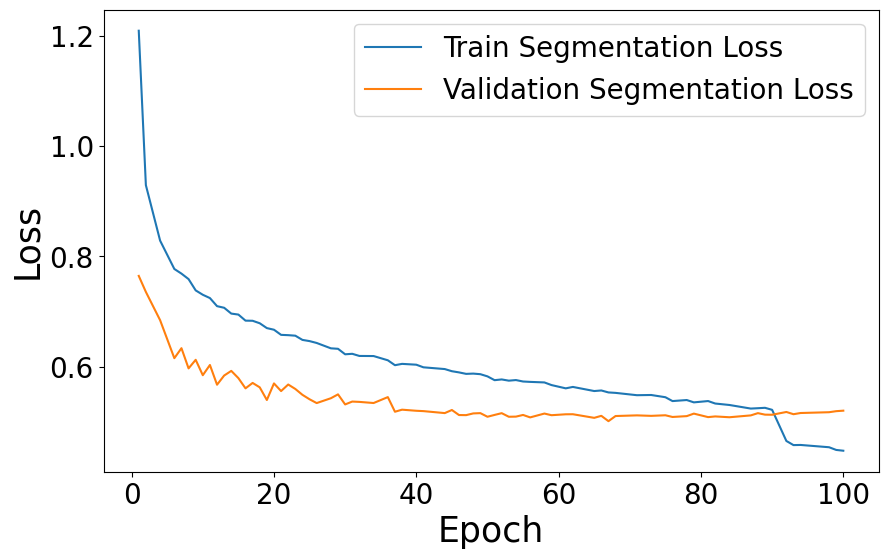

In [ ]:
# 100_epchs-train_seg_loss_val_seg_loss_vs_epoch_chart_data.customization
import matplotlib.pyplot as plt

# Provided data
data = [
    {"x": [1, 2, 2, 4, 6, 7, 8, 9, 10, 10, 11, 12, 13, 13, 14, 14, 15, 16, 17, 18, 18, 19, 19, 20, 20, 21, 22, 22, 23, 23, 24, 25, 25, 26, 28, 29, 30, 31, 32, 34, 36, 37, 37, 38, 38, 40, 41, 41, 44, 45, 45, 46, 47, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 58, 59, 59, 61, 61, 62, 65, 65, 66, 67, 67, 68, 71, 73, 75, 76, 78, 79, 81, 82, 84, 87, 87, 88, 89, 90, 90, 92, 93, 93, 94, 94, 98, 99, 99, 100],
     "y": [1.20895, 0.92912, 0.92912, 0.82862, 0.7772, 0.76879, 0.75885, 0.73839, 0.73047, 0.73047, 0.72448, 0.70983, 0.70689, 0.70689, 0.69636, 0.69636, 0.69458, 0.68358, 0.68334, 0.67883, 0.67883, 0.67007, 0.67007, 0.66712, 0.66712, 0.65782, 0.65727, 0.65727, 0.65632, 0.65632, 0.64868, 0.6465, 0.6465, 0.64313, 0.63341, 0.63255, 0.62261, 0.62348, 0.61961, 0.61942, 0.61174, 0.60284, 0.60284, 0.60524, 0.60524, 0.60374, 0.59901, 0.59901, 0.59583, 0.59194, 0.59194, 0.5898, 0.58712, 0.58712, 0.58761, 0.58655, 0.5826, 0.5757, 0.57703, 0.57481, 0.57591, 0.57329, 0.5726, 0.57161, 0.57161, 0.56682, 0.56682, 0.5609, 0.5609, 0.56346, 0.55601, 0.55601, 0.55703, 0.55349, 0.55349, 0.55268, 0.54847, 0.54885, 0.54481, 0.53783, 0.53972, 0.53548, 0.53787, 0.53338, 0.53074, 0.52425, 0.52425, 0.5249, 0.52562, 0.52195, 0.52195, 0.46554, 0.45805, 0.45805, 0.45831, 0.45831, 0.45417, 0.44929, 0.44929, 0.44786],
     "type": "scattergl",
     "name": "63db58076a724c10a3cb27c16572212d train/seg_loss"
    },
    {"x": [1, 2, 2, 4, 6, 7, 8, 9, 10, 10, 11, 12, 13, 13, 14, 14, 15, 16, 17, 18, 18, 19, 19, 20, 20, 21, 22, 22, 23, 23, 24, 25, 25, 26, 28, 29, 30, 31, 32, 34, 36, 37, 37, 38, 38, 40, 41, 41, 44, 45, 45, 46, 47, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 58, 59, 59, 61, 61, 62, 65, 65, 66, 67, 67, 68, 71, 73, 75, 76, 78, 79, 81, 82, 84, 87, 87, 88, 89, 90, 90, 92, 93, 93, 94, 94, 98, 99, 99, 100],
     "y": [0.76465, 0.73563, 0.73563, 0.68441, 0.61555, 0.63367, 0.59707, 0.61263, 0.5847, 0.5847, 0.60322, 0.56746, 0.58411, 0.58411, 0.59255, 0.59255, 0.57941, 0.56089, 0.57072, 0.56272, 0.56272, 0.53976, 0.53976, 0.56983, 0.56983, 0.55595, 0.56784, 0.56784, 0.55978, 0.55978, 0.54914, 0.54109, 0.54109, 0.5342, 0.54299, 0.55, 0.53175, 0.53694, 0.53635, 0.5343, 0.54501, 0.5185, 0.5185, 0.52223, 0.52223, 0.52025, 0.51963, 0.51963, 0.51604, 0.52166, 0.52166, 0.51252, 0.51235, 0.51235, 0.51546, 0.51597, 0.50942, 0.51274, 0.51592, 0.50941, 0.50966, 0.51268, 0.50826, 0.5152, 0.5152, 0.51223, 0.51223, 0.51388, 0.51388, 0.51398, 0.50744, 0.50744, 0.51109, 0.50142, 0.50142, 0.51073, 0.51192, 0.51104, 0.5121, 0.50902, 0.51055, 0.5151, 0.50876, 0.50999, 0.50853, 0.51186, 0.51186, 0.51596, 0.51323, 0.51304, 0.51304, 0.51807, 0.51402, 0.51402, 0.5162, 0.5162, 0.51764, 0.51953, 0.51953, 0.52043],
     "type": "scattergl",
     "name": "63db58076a724c10a3cb27c16572212d val/seg_loss"
    }
]

# Extracted information
iterations = data[0]["x"]
total_losses = data[0]["y"]
validation_losses = data[1]["y"]

# Create the logs list
logs = [{"iteration": iteration, "total_loss": total_loss, "validation_loss": validation_loss} for iteration, total_loss, validation_loss in zip(iterations, total_losses, validation_losses)]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(iterations, total_losses, label='Train Segmentation Loss', marker='')
plt.plot(iterations, validation_losses, label='Validation Segmentation Loss', marker='')

# Add labels and title
plt.xlabel('Epoch', fontsize=25)
plt.ylabel('Loss', fontsize=25)
# plt.title('Train and Validation Box Loss over 100 Epochs')
plt.legend(fontsize=20)

plt.tick_params(axis='both', labelsize=20)

# Show the plot
plt.show()


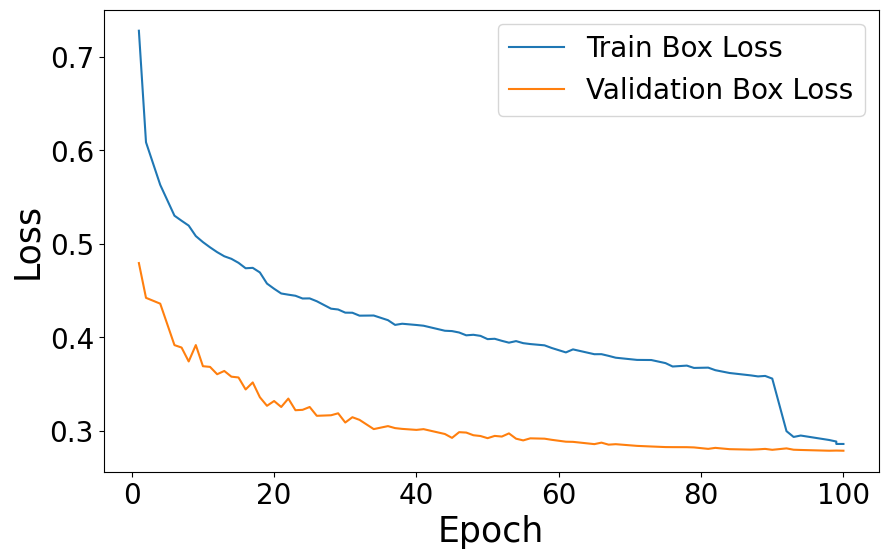

In [ ]:
# 100_epochs-train_box_loss_val_box_loss_vs_epoch_chart_data
import matplotlib.pyplot as plt
import numpy as np

# Provided data
data = [
    {"x": [1, 2, 2, 4, 6, 7, 8, 9, 10, 10, 11, 12, 13, 13, 14, 14, 15, 16, 17, 18, 18, 19, 19, 20, 20, 21, 22, 22, 23, 23, 24, 25, 25, 26, 28, 29, 30, 31, 32, 34, 36, 37, 37, 38, 38, 40, 41, 41, 44, 45, 45, 46, 47, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 58, 59, 59, 61, 61, 62, 65, 65, 66, 67, 67, 68, 71, 73, 75, 76, 78, 79, 81, 82, 84, 87, 87, 88, 89, 90, 90, 92, 93, 93, 94, 94, 98, 99, 99, 100],
     "y": [0.72779, 0.60857, 0.60857, 0.56302, 0.53007, 0.52466, 0.51948, 0.50827, 0.50184, 0.50184, 0.49624, 0.4911, 0.48669, 0.48669, 0.48396, 0.48396, 0.47968, 0.47388, 0.4743, 0.46942, 0.46942, 0.4575, 0.4575, 0.45197, 0.45197, 0.44691, 0.44564, 0.44564, 0.44448, 0.44448, 0.44155, 0.44166, 0.44166, 0.43861, 0.43067, 0.42979, 0.42643, 0.42633, 0.4232, 0.42336, 0.41838, 0.41333, 0.41333, 0.41457, 0.41457, 0.41323, 0.41245, 0.41245, 0.40708, 0.40671, 0.40671, 0.4052, 0.40219, 0.40219, 0.40276, 0.40161, 0.39812, 0.39849, 0.3963, 0.39433, 0.396, 0.39382, 0.39285, 0.39148, 0.39148, 0.38867, 0.38867, 0.38392, 0.38392, 0.38715, 0.382, 0.382, 0.38204, 0.38024, 0.38024, 0.37826, 0.37591, 0.37578, 0.37248, 0.36886, 0.36981, 0.36733, 0.36765, 0.36492, 0.36191, 0.35934, 0.35934, 0.35826, 0.35878, 0.35592, 0.35592, 0.29974, 0.29355, 0.29355, 0.29506, 0.29506, 0.29029, 0.28865, 0.28606, 0.28606],
     "type": "scattergl",
     "name": "63db58076a724c10a3cb27c16572212d train/box_loss"
    },
    {"x": [1, 2, 2, 4, 6, 7, 8, 9, 10, 10, 11, 12, 13, 13, 14, 14, 15, 16, 17, 18, 18, 19, 19, 20, 20, 21, 22, 22, 23, 23, 24, 25, 25, 26, 28, 29, 30, 31, 32, 34, 36, 37, 37, 38, 38, 40, 41, 41, 44, 45, 45, 46, 47, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 58, 59, 59, 61, 61, 62, 65, 65, 66, 67, 67, 68, 71, 73, 75, 76, 78, 79, 81, 82, 84, 87, 87, 88, 89, 90, 90, 92, 93, 93, 94, 94, 98, 99, 99, 100],
     "y": [0.47944, 0.44227, 0.44227, 0.43602, 0.39172, 0.38911, 0.37426, 0.39178, 0.36917, 0.36917, 0.36844, 0.36059, 0.36409, 0.36409, 0.35799, 0.35799, 0.35713, 0.3443, 0.35183, 0.33602, 0.33602, 0.32685, 0.32685, 0.33195, 0.33195, 0.32559, 0.33456, 0.33456, 0.32213, 0.32213, 0.32254, 0.32558, 0.32558, 0.31615, 0.31673, 0.31883, 0.30898, 0.31464, 0.31183, 0.30194, 0.30514, 0.303, 0.303, 0.30216, 0.30216, 0.3011, 0.30189, 0.30189, 0.2967, 0.29256, 0.29256, 0.29866, 0.29823, 0.29823, 0.29539, 0.29455, 0.29224, 0.29467, 0.29397, 0.29736, 0.2917, 0.28987, 0.29207, 0.29171, 0.29171, 0.2905, 0.2905, 0.28848, 0.28848, 0.28831, 0.28588, 0.28588, 0.28747, 0.28532, 0.28532, 0.28582, 0.28401, 0.28335, 0.28273, 0.28266, 0.28261, 0.28236, 0.28081, 0.28188, 0.28049, 0.28, 0.28, 0.28031, 0.28078, 0.27981, 0.27981, 0.28133, 0.2799, 0.2799, 0.27964, 0.27964, 0.27883, 0.27899, 0.27899, 0.27883],
     "type": "scattergl",
     "name": "63db58076a724c10a3cb27c16572212d val/box_loss"
    }
]

# Extracted information
iterations = data[0]["x"]
total_losses = data[0]["y"]
validation_losses = data[1]["y"]

# Create the logs list
logs = [{"iteration": iteration, "total_loss": total_loss, "validation_loss": validation_loss} for iteration, total_loss, validation_loss in zip(iterations, total_losses, validation_losses)]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(iterations, total_losses, label='Train Box Loss', marker='')
plt.plot(iterations, validation_losses, label='Validation Box Loss', marker='')

# Add labels and title
plt.xlabel('Epoch', fontsize=25)
plt.ylabel('Loss', fontsize=25)
# plt.title('Train and Validation Box Loss over 100 Epochs')
plt.legend(fontsize=20)

plt.tick_params(axis='both', labelsize=20)

# Show the plot
plt.show()


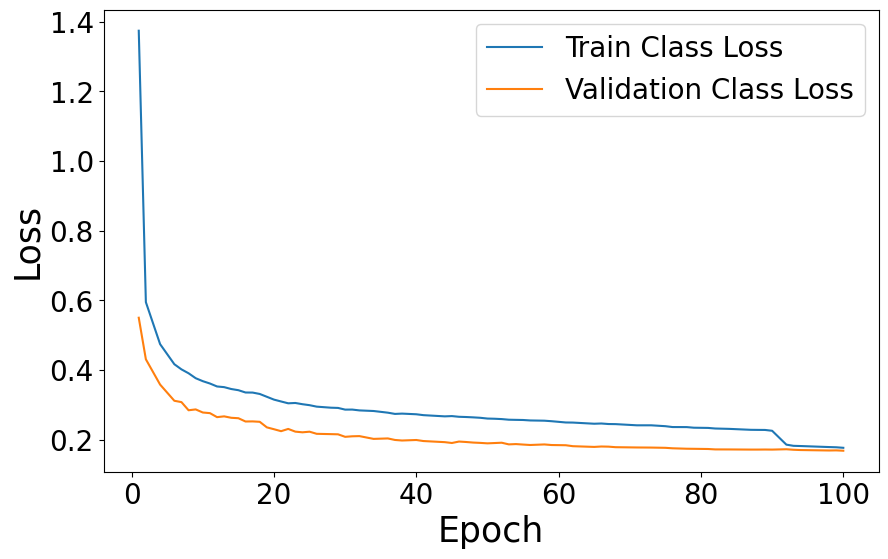

In [ ]:
# 100_epochs-train_cls_loss_val_cls_loss_vs_epoch_chart_data
import matplotlib.pyplot as plt
import numpy as np

# Provided data
data = [
    {"x": [1, 2, 2, 4, 6, 7, 8, 9, 10, 10, 11, 12, 13, 13, 14, 14, 15, 16, 17, 18, 18, 19, 19, 20, 20, 21, 22, 22, 23, 23, 24, 25, 25, 26, 28, 29, 30, 31, 32, 34, 36, 37, 37, 38, 38, 40, 41, 41, 44, 45, 45, 46, 47, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 58, 59, 59, 61, 61, 62, 65, 65, 66, 67, 67, 68, 71, 73, 75, 76, 78, 79, 81, 82, 84, 87, 87, 88, 89, 90, 90, 92, 93, 93, 94, 94, 98, 99, 99, 100, None],
     "y": [1.37389, 0.59478, 0.59478, 0.47432, 0.41668, 0.4019, 0.39071, 0.37654, 0.36803, 0.36803, 0.36132, 0.35284, 0.3509, 0.3509, 0.3455, 0.3455, 0.34212, 0.33554, 0.3353, 0.33133, 0.33133, 0.32321, 0.32321, 0.31509, 0.31509, 0.30975, 0.30451, 0.30451, 0.30545, 0.30545, 0.30192, 0.29914, 0.29914, 0.29493, 0.2919, 0.29125, 0.28639, 0.28651, 0.28413, 0.2824, 0.27761, 0.27405, 0.27405, 0.27493, 0.27493, 0.27304, 0.27051, 0.27051, 0.26703, 0.26782, 0.26782, 0.26581, 0.26514, 0.26514, 0.26415, 0.26291, 0.26073, 0.26018, 0.25921, 0.25743, 0.25699, 0.25661, 0.25531, 0.25459, 0.25459, 0.25313, 0.25313, 0.24949, 0.24949, 0.24921, 0.24587, 0.24587, 0.24655, 0.24504, 0.24504, 0.24475, 0.24135, 0.24136, 0.23883, 0.23636, 0.23621, 0.23446, 0.23386, 0.23217, 0.2311, 0.22842, 0.22842, 0.22819, 0.22804, 0.22567, 0.22567, 0.18587, 0.18247, 0.18247, 0.18187, 0.18187, 0.17892, 0.17831, 0.17831, 0.17678, 0.17678],
     "type": "scattergl",
     "name": "63db58076a724c10a3cb27c16572212d train/cls_loss"
    },
    {"x": [1, 2, 2, 4, 6, 7, 8, 9, 10, 10, 11, 12, 13, 13, 14, 14, 15, 16, 17, 18, 18, 19, 19, 20, 20, 21, 22, 22, 23, 23, 24, 25, 25, 26, 28, 29, 30, 31, 32, 34, 36, 37, 37, 38, 38, 40, 41, 41, 44, 45, 45, 46, 47, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 58, 59, 59, 61, 61, 62, 65, 65, 66, 67, 67, 68, 71, 73, 75, 76, 78, 79, 81, 82, 84, 87, 87, 88, 89, 90, 90, 92, 93, 93, 94, 94, 98, 99, 99, 100, None],
     "y": [0.55013, 0.43083, 0.43083, 0.35825, 0.31179, 0.30792, 0.28455, 0.28698, 0.27811, 0.27811, 0.27629, 0.26481, 0.26703, 0.26703, 0.26293, 0.26293, 0.2617, 0.25229, 0.25257, 0.25141, 0.25141, 0.23547, 0.23547, 0.2301, 0.2301, 0.22449, 0.23097, 0.23097, 0.22318, 0.22318, 0.22125, 0.22303, 0.22303, 0.21694, 0.21602, 0.21551, 0.2083, 0.20981, 0.21037, 0.20237, 0.20369, 0.1993, 0.1993, 0.19772, 0.19772, 0.19919, 0.19618, 0.19618, 0.193, 0.19058, 0.19058, 0.19473, 0.19344, 0.19344, 0.1918, 0.19087, 0.18959, 0.19047, 0.19137, 0.18662, 0.18748, 0.1861, 0.18486, 0.18644, 0.18644, 0.18476, 0.18476, 0.18415, 0.18415, 0.1814, 0.17934, 0.17934, 0.18051, 0.18011, 0.18011, 0.17855, 0.17773, 0.17745, 0.17673, 0.17539, 0.17413, 0.17389, 0.17335, 0.17218, 0.17206, 0.17168, 0.17168, 0.17168, 0.17185, 0.17164, 0.17164, 0.17263, 0.17118, 0.17118, 0.17036, 0.17036, 0.16907, 0.16939, 0.16939, 0.16841, 0.16841],
     "type": "scattergl",
     "name": "63db58076a724c10a3cb27c16572212d val/cls_loss"
    }
]

# Extracted information
iterations = data[0]["x"]
total_losses = data[0]["y"]
validation_losses = data[1]["y"]

# Create the logs list
logs = [{"iteration": iteration, "total_loss": total_loss, "validation_loss": validation_loss} for iteration, total_loss, validation_loss in zip(iterations, total_losses, validation_losses)]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(iterations, total_losses, label='Train Class Loss', marker='')
plt.plot(iterations, validation_losses, label='Validation Class Loss', marker='')

# Add labels and title
plt.xlabel('Epoch', fontsize=25)
plt.ylabel('Loss', fontsize=25)
# plt.title('Train and Validation Box Loss over 100 Epochs')
plt.legend(fontsize=20)

plt.tick_params(axis='both', labelsize=20)

# Show the plot
plt.show()

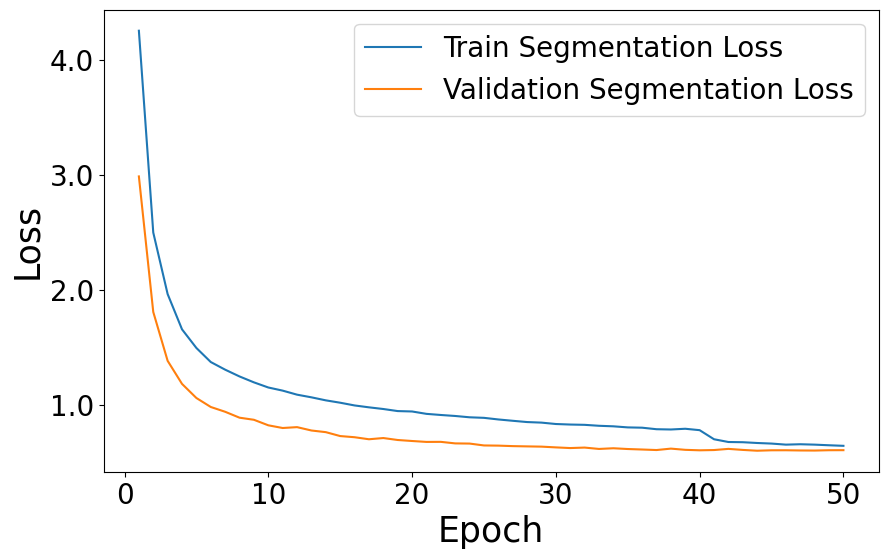

In [ ]:
# 20240111_newmodel_segmentation_50epochs_earlystopping_5patience_full-train_seg_loss_val_seg_loss_vs_epoch_chart_data.customization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Provided data
data = [
    {"x": [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50],
     "y": [4.25329, 4.25329, 2.4992, 2.4992, 1.96424, 1.96424, 1.65778, 1.65778, 1.49578, 1.49578, 1.37358, 1.37358, 1.30724, 1.30724, 1.24826, 1.24826, 1.19702, 1.19702, 1.15235, 1.15235, 1.12503, 1.12503, 1.08996, 1.08996, 1.06682, 1.06682, 1.04054, 1.04054, 1.01999, 1.01999, 0.9963, 0.9963, 0.97986, 0.97986, 0.9653, 0.9653, 0.94734, 0.94734, 0.94386, 0.94386, 0.92315, 0.92315, 0.91339, 0.91339, 0.90474, 0.90474, 0.89331, 0.89331, 0.88854, 0.88854, 0.87448, 0.87448, 0.86295, 0.86295, 0.85191, 0.85191, 0.847, 0.847, 0.83492, 0.83492, 0.8303, 0.8303, 0.82776, 0.82776, 0.81951, 0.81951, 0.81484, 0.81484, 0.80551, 0.80551, 0.80288, 0.80288, 0.78965, 0.78965, 0.78729, 0.78729, 0.79363, 0.79363, 0.7814, 0.7814, 0.70244, 0.70244, 0.67855, 0.67855, 0.67672, 0.67672, 0.66994, 0.66994, 0.6649, 0.6649, 0.65568, 0.65568, 0.65903, 0.65903, 0.65563, 0.65563, 0.65015, 0.65015, 0.64538, 0.64538],
     "type": "scattergl",
     "name": "8eb5d62c4fa247fc9e4f766d37d6ff97 train/seg_loss"
    },
    {"x": [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50],
     "y": [2.98695, 2.98695, 1.80886, 1.80886, 1.3841, 1.3841, 1.1837, 1.1837, 1.06098, 1.06098, 0.98292, 0.98292, 0.94128, 0.94128, 0.88983, 0.88983, 0.87168, 0.87168, 0.82369, 0.82369, 0.80019, 0.80019, 0.80777, 0.80777, 0.77853, 0.77853, 0.76417, 0.76417, 0.73015, 0.73015, 0.72006, 0.72006, 0.7024, 0.7024, 0.71299, 0.71299, 0.69597, 0.69597, 0.68725, 0.68725, 0.67927, 0.67927, 0.67982, 0.67982, 0.66642, 0.66642, 0.66491, 0.66491, 0.64856, 0.64856, 0.64704, 0.64704, 0.64276, 0.64276, 0.64042, 0.64042, 0.63826, 0.63826, 0.63172, 0.63172, 0.62591, 0.62591, 0.6301, 0.6301, 0.61821, 0.61821, 0.62416, 0.62416, 0.61754, 0.61754, 0.61328, 0.61328, 0.60868, 0.60868, 0.62105, 0.62105, 0.61048, 0.61048, 0.60638, 0.60638, 0.60864, 0.60864, 0.61876, 0.61876, 0.60972, 0.60972, 0.60275, 0.60275, 0.60652, 0.60652, 0.60678, 0.60678, 0.60493, 0.60493, 0.6042, 0.6042, 0.60709, 0.60709, 0.60749, 0.60749],
     "type": "scattergl",
     "name": "8eb5d62c4fa247fc9e4f766d37d6ff97 val/seg_loss"
    }
]

# Extracted information
iterations = data[0]["x"]
total_losses = data[0]["y"]
validation_losses = data[1]["y"]

# Create the logs list
logs = [{"iteration": iteration, "total_loss": total_loss, "validation_loss": validation_loss} for iteration, total_loss, validation_loss in zip(iterations, total_losses, validation_losses)]

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(iterations, total_losses, label='Train Segmentation Loss', marker='')
ax.plot(iterations, validation_losses, label='Validation Segmentation Loss', marker='')

# Add labels and title
ax.set_xlabel('Epoch', fontsize=25)
ax.set_ylabel('Loss', fontsize=25)
ax.legend(fontsize=20)
ax.tick_params(axis='both', labelsize=20)

# Format y-axis to display one decimal place
def format_func(value, _):
    return f'{value:.1f}'

ax.yaxis.set_major_formatter(FuncFormatter(format_func))

# Show the plot
plt.show()


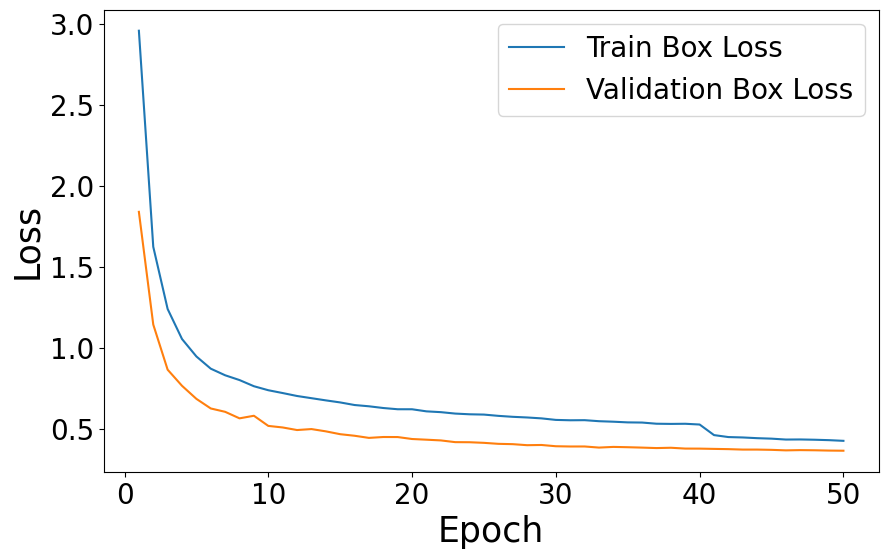

In [ ]:
# 20240111_newmodel_segmentation_50epochs_earlystopping_5patience_full-train_box_loss_val_box_loss_vs_epoch_chart_data
import matplotlib.pyplot as plt

# Provided data
data = [
    {"x": [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50],
     "y": [2.95967, 2.95967, 1.62535, 1.62535, 1.24119, 1.24119, 1.05572, 1.05572, 0.94796, 0.94796, 0.87252, 0.87252, 0.83176, 0.83176, 0.80218, 0.80218, 0.76416, 0.76416, 0.73943, 0.73943, 0.72203, 0.72203, 0.70384, 0.70384, 0.69032, 0.69032, 0.6768, 0.6768, 0.66411, 0.66411, 0.64809, 0.64809, 0.64025, 0.64025, 0.62959, 0.62959, 0.62198, 0.62198, 0.62187, 0.62187, 0.60897, 0.60897, 0.60403, 0.60403, 0.59523, 0.59523, 0.59086, 0.59086, 0.58903, 0.58903, 0.58116, 0.58116, 0.57524, 0.57524, 0.57118, 0.57118, 0.56561, 0.56561, 0.55615, 0.55615, 0.5539, 0.5539, 0.5545, 0.5545, 0.54816, 0.54816, 0.54504, 0.54504, 0.54084, 0.54084, 0.5398, 0.5398, 0.53256, 0.53256, 0.53144, 0.53144, 0.53227, 0.53227, 0.52764, 0.52764, 0.46234, 0.46234, 0.45018, 0.45018, 0.44774, 0.44774, 0.44333, 0.44333, 0.44038, 0.44038, 0.43483, 0.43483, 0.43541, 0.43541, 0.43369, 0.43369, 0.43106, 0.43106, 0.42692, 0.42692],
     "type": "scattergl",
     "name": "8eb5d62c4fa247fc9e4f766d37d6ff97 train/box_loss"
    },
    {"x": [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50],
     "y": [1.84109, 1.84109, 1.14503, 1.14503, 0.86632, 0.86632, 0.76671, 0.76671, 0.68613, 0.68613, 0.62676, 0.62676, 0.6061, 0.6061, 0.5658, 0.5658, 0.58177, 0.58177, 0.51911, 0.51911, 0.50949, 0.50949, 0.49356, 0.49356, 0.49959, 0.49959, 0.48551, 0.48551, 0.4679, 0.4679, 0.45826, 0.45826, 0.44508, 0.44508, 0.45054, 0.45054, 0.45025, 0.45025, 0.43817, 0.43817, 0.43393, 0.43393, 0.42949, 0.42949, 0.41883, 0.41883, 0.41824, 0.41824, 0.41449, 0.41449, 0.40839, 0.40839, 0.40636, 0.40636, 0.40001, 0.40001, 0.40131, 0.40131, 0.39352, 0.39352, 0.39195, 0.39195, 0.39208, 0.39208, 0.38524, 0.38524, 0.38939, 0.38939, 0.38748, 0.38748, 0.38504, 0.38504, 0.38221, 0.38221, 0.38416, 0.38416, 0.37908, 0.37908, 0.3788, 0.3788, 0.37713, 0.37713, 0.37561, 0.37561, 0.37287, 0.37287, 0.37288, 0.37288, 0.37122, 0.37122, 0.36805, 0.36805, 0.36959, 0.36959, 0.3686, 0.3686, 0.36675, 0.36675, 0.36584, 0.36584],
     "type": "scattergl",
     "name": "8eb5d62c4fa247fc9e4f766d37d6ff97 val/box_loss"
    }
]

# Extracted information
iterations = data[0]["x"]
total_losses = data[0]["y"]
validation_losses = data[1]["y"]

# Create the logs list
logs = [{"iteration": iteration, "total_loss": total_loss, "validation_loss": validation_loss} for iteration, total_loss, validation_loss in zip(iterations, total_losses, validation_losses)]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(iterations, total_losses, label='Train Box Loss', marker='')
plt.plot(iterations, validation_losses, label='Validation Box Loss', marker='')

# Add labels and title
plt.xlabel('Epoch', fontsize=25)
plt.ylabel('Loss', fontsize=25)
# plt.title('Train and Validation Box Loss over 100 Epochs')
plt.legend(fontsize=20)

plt.tick_params(axis='both', labelsize=20)

# Display the plot
plt.show()


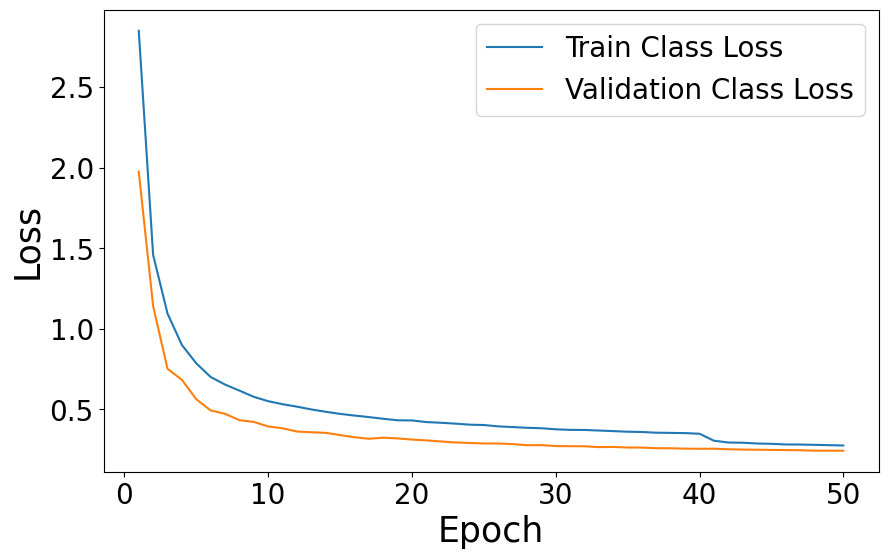

In [ ]:
# 20240111_newmodel_segmentation_50epochs_earlystopping_5patience_full-train_cls_loss_val_cls_loss_vs_epoch_chart_data
import matplotlib.pyplot as plt

# Provided data
data = [
    {"x": [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50],
     "y": [2.84986, 2.84986, 1.45871, 1.45871, 1.09508, 1.09508, 0.90009, 0.90009, 0.78627, 0.78627, 0.70164, 0.70164, 0.65453, 0.65453, 0.61704, 0.61704, 0.57838, 0.57838, 0.5514, 0.5514, 0.53265, 0.53265, 0.51743, 0.51743, 0.50015, 0.50015, 0.48564, 0.48564, 0.47267, 0.47267, 0.46212, 0.46212, 0.45284, 0.45284, 0.44228, 0.44228, 0.43298, 0.43298, 0.43191, 0.43191, 0.42175, 0.42175, 0.41752, 0.41752, 0.41217, 0.41217, 0.40583, 0.40583, 0.40348, 0.40348, 0.39497, 0.39497, 0.3909, 0.3909, 0.38622, 0.38622, 0.38373, 0.38373, 0.37695, 0.37695, 0.37343, 0.37343, 0.37287, 0.37287, 0.36921, 0.36921, 0.36572, 0.36572, 0.36187, 0.36187, 0.36022, 0.36022, 0.3558, 0.3558, 0.3546, 0.3546, 0.35339, 0.35339, 0.34941, 0.34941, 0.30623, 0.30623, 0.29499, 0.29499, 0.29363, 0.29363, 0.28874, 0.28874, 0.28691, 0.28691, 0.28293, 0.28293, 0.28247, 0.28247, 0.28046, 0.28046, 0.27847, 0.27847, 0.27657, 0.27657],
     "type": "scattergl",
     "name": "8eb5d62c4fa247fc9e4f766d37d6ff97 train/cls_loss"
    },
    {"x": [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50],
     "y": [1.97523, 1.97523, 1.14165, 1.14165, 0.75267, 0.75267, 0.6839, 0.6839, 0.56353, 0.56353, 0.49424, 0.49424, 0.47312, 0.47312, 0.43355, 0.43355, 0.42261, 0.42261, 0.3947, 0.3947, 0.38334, 0.38334, 0.36308, 0.36308, 0.35851, 0.35851, 0.35503, 0.35503, 0.34107, 0.34107, 0.32772, 0.32772, 0.3182, 0.3182, 0.32479, 0.32479, 0.32058, 0.32058, 0.31329, 0.31329, 0.30806, 0.30806, 0.30165, 0.30165, 0.2952, 0.2952, 0.29221, 0.29221, 0.28898, 0.28898, 0.28885, 0.28885, 0.28504, 0.28504, 0.27829, 0.27829, 0.27881, 0.27881, 0.27297, 0.27297, 0.27207, 0.27207, 0.27161, 0.27161, 0.26632, 0.26632, 0.26766, 0.26766, 0.26397, 0.26397, 0.26351, 0.26351, 0.25969, 0.25969, 0.25905, 0.25905, 0.25686, 0.25686, 0.25618, 0.25618, 0.2565, 0.2565, 0.25306, 0.25306, 0.2513, 0.2513, 0.25016, 0.25016, 0.24908, 0.24908, 0.24821, 0.24821, 0.2469, 0.2469, 0.24435, 0.24435, 0.24435, 0.24435, 0.24403, 0.24403],
     "type": "scattergl",
     "name": "8eb5d62c4fa247fc9e4f766d37d6ff97 val/cls_loss"
    }
]

# Extracted information
iterations = data[0]["x"]
total_losses = data[0]["y"]
validation_losses = data[1]["y"]

# Create the logs list
logs = [{"iteration": iteration, "total_loss": total_loss, "validation_loss": validation_loss} for iteration, total_loss, validation_loss in zip(iterations, total_losses, validation_losses)]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(iterations, total_losses, label='Train Class Loss', marker='')
plt.plot(iterations, validation_losses, label='Validation Class Loss', marker='')

# Add labels and title
plt.xlabel('Epoch', fontsize=25)
plt.ylabel('Loss', fontsize=25)
# plt.title('Train and Validation Box Loss over 100 Epochs')
plt.legend(fontsize=20)

plt.tick_params(axis='both', labelsize=20)

# Display the plot
plt.show()


# Prediction

!!! change to CPU or run the code in a seperate file !!!

In [ ]:
# https://docs.ultralytics.com/usage/cfg/#predict
# Test performance on 10 epochs trained own model based on yolov8n-seg.pt
!yolo predict model='/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240110_yolov8n-seg_segmentation_100epochs_new/weights/best.pt' source='/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/test_4/images' conf=0.7 iou=0.6 classes=[0,1,2,3] show_boxes=True line_width=1 visualize=False agnostic_nms=True retina_masks=False imgsz=640 show=False

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 195 layers, 3258844 parameters, 0 gradients, 12.0 GFLOPs

image 1/20 /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/test_4/images/IMG_6037_JPG.rf.e64d534cd448bbc972b83efe555bd47a.jpg: 640x640 6 cardboards, 4 hard_plastics, 6 metals, 5 soft_plastics, 181.2ms
image 2/20 /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/test_4/images/IMG_6046_JPG.rf.9ecf2a2b20e1d1dd584304ca5c2eaded.jpg: 640x640 4 cardboards, 3 hard_plastics, 7 metals, 7 soft_plastics, 100.4ms
image 3/20 /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/test_4/images/IMG_6056_JPG.rf.beee06028e790fad9933161ace9f031f.jpg: 640x640 4 cardboards, 8 hard_plastics, 8 metals, 2 soft_plastics, 83.6ms
image 4/20 /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/test_4/images/IMG_6066_JPG.rf.a141282935c6b2632b08d65c73fc167b.jpg: 640x640 4 cardboards, 4 hard_plastics

In [ ]:
# used cause !scp -r /content/runs '/content/gdrive/My Drive/imagesegmentationyolov8' wasn't working

import shutil

source_directory = "/content/runs/segment/predict3"
destination_directory = "/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240110_yolov8n-seg_segmentation_100epochs_new/predict_test_4_best_weights"

shutil.copytree(source_directory, destination_directory)

'/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240110_yolov8n-seg_segmentation_100epochs_new/predict_test_4_best_weights'

In [ ]:
# Test performane on plain yolov8n-seg.pt
!yolo predict model=yolov8n-seg.pt source='/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/test/images'

100% 6.73M/6.73M [00:00<00:00, 251MB/s]
Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs

image 1/100 /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/test/images/IMG_6033_JPG.rf.8b096f06663079b312a8728d3f433615.jpg: 640x640 (no detections), 169.3ms
image 2/100 /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/test/images/IMG_6034_JPG.rf.e19911e3b2a9558115c8467a3c1f94f0.jpg: 640x640 (no detections), 107.7ms
image 3/100 /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/test/images/IMG_6035_JPG.rf.fa686bde5ba0f6d7f675071a6017d45c.jpg: 640x640 (no detections), 103.7ms
image 4/100 /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/test/images/IMG_6036_JPG.rf.40a7072d6dd963a4e415d102f0a42f34.jpg: 640x640 (no detections), 99.7ms
image 5/100 /content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/test/images/I

In [ ]:
# used cause !scp -r /content/runs '/content/gdrive/My Drive/imagesegmentationyolov8' wasn't working

import shutil

source_directory = "/content/runs/segment/predict"
destination_directory = "/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/predict_yolov8n-seg_1"

shutil.copytree(source_directory, destination_directory)

'/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/predict_yolov8n-seg_1'